In [1]:
import numpy as np
import pandas as pd
import os
from pandas import DataFrame
import matplotlib.pyplot as plt

## Loading the Data

In [2]:
#finds the directory path for the file
dir_path = os.path.dirname(os.path.realpath('.\data\countries-aggregated.csv'))
dir_path
f = []
for (dirpath, dirnames, filenames) in os.walk(dir_path):
    f.extend(filenames)
    break
#Makes a list of all the files with the .csv ending
files=[]
for Type in f:
    if Type.endswith('.csv'):
        files.append(Type)
# Makes a list of all the filenames
dfs_names=[]
for x in files:
    n, q =x.split('.')
    dfs_names.append(n)

# Creats a dictionary with all my .cvs files so that I can analyze it with Pandas
dfs={}
for dfn,file in zip(dfs_names, files):
    #print("./data/" + file)
    print('Loading...',dfn)
    dfs[dfn] = pd.read_csv("./data/" + file, index_col=[0], parse_dates=[1,2,-2,-1])  #index column is the first column, and the 2nd or 3rd (or columns 1, 2) is the date column so we can parse that ahead
print('Finished Loading')

Loading... CA_by_county
Loading... CDC_Cases_and_deaths
Loading... complete_vaccine_rate
Loading... countries-aggregated
Loading... COVID_Varients
Loading... data_county_current
Loading... data_county_timeseries
Loading... DECENNIALPL2020
Loading... key-countries-pivoted
Loading... reference
Loading... States_with_boarders
Loading... state_abriv
Loading... state_neighbors
Loading... time-series-19-covid-combined
Loading... Total_States
Loading... us_confirmed
Loading... us_county_population_data
Loading... us_deaths
Loading... us_simplified
Loading... us_simplified_with_county_data
Loading... vaccine_rate_by_county
Loading... worldwide-aggregate
Finished Loading


In [3]:
us_confirmed = dfs["us_confirmed"].copy()
us_confirmed

,Admin2,Date,Case,Country/Region,Province/State
index,,,,,
0,Autauga,2020-01-22,0,US,Alabama
1,Autauga,2020-01-23,0,US,Alabama
2,Autauga,2020-01-24,0,US,Alabama
3,Autauga,2020-01-25,0,US,Alabama
4,Autauga,2020-01-26,0,US,Alabama
...,...,...,...,...,...
2449681,Weston,2022-01-19,1332,US,Wyoming
2449682,Weston,2022-01-20,1341,US,Wyoming
2449683,Weston,2022-01-21,1349,US,Wyoming


#### Codebook:
'STATE_NAME': state name as an abbreviation

'STATE': state fips code as integer

'COUNTY_NAME': county name appended with "County" or "Parish"

'COUNTY': 5-digit county fips code as integer

'GEOFLAG': 'County' denotes county level data; 'State' denotes downscaled state data

'DATE': This date is more representative of data updating processes rather than of the vaccination process. It may also not be the same day of the week every week. Thus we recommend using the WEEK and YEAR column for analyses.

'CASE_TYPE': 'Booster' or 'Booster Coverage': protection with an additional dose for compltely protected individuals; 'Complete' or 'Complete Coverage" : complete protection with 2-dose Moderna or Pfizer or 1-dose Janssen; 'Partial' or 'Partial Coverage" : partial protection with 1-dose Moderna or Pfizer

'CASES': counts for CASE_TYPE = Booster or Complete or Partial; percentages of population for CASE_TYPE = Booster Coverage or Complete Coverage or Partial Coverage

'WEEK' = the ISO week of the year the data is for. (The DATE column is a date within this week, but not always the same day of the week. Thus, we recommend use of the WEEK and YEAR column instead of DATE for all analyses.)

'YEAR' = the year that the data corresponds to

'DEMO_GROUP' = racial/ethnic group

In [4]:
data_county_timeseries = dfs["data_county_timeseries"].copy()
data_county_timeseries

,STATE,COUNTY_NAME,COUNTY,GEOFLAG,DATE,CASE_TYPE,CASES,POPN,WEEK,YEAR
STATE_NAME,,,,,,,,,,
AL,1.0,Autauga,1001,County,2021-12-19,Booster,4791.0,55869.0,50,2021-01-01
AL,1.0,Autauga,1001,County,2021-12-26,Booster,5303.0,55869.0,51,2021-01-01
AL,1.0,Autauga,1001,County,2022-01-02,Booster,5673.0,55869.0,52,2021-01-01
AL,1.0,Autauga,1001,County,2022-01-09,Booster,6139.0,55869.0,1,2022-01-01
AL,1.0,Autauga,1001,County,2022-01-16,Booster,6526.0,55869.0,2,2022-01-01
...,...,...,...,...,...,...,...,...,...,...
VI,78.0,St. Thomas Island,78030,County,2022-04-03,Partial,29350.0,NaN,13,2022-01-01
VI,78.0,St. Thomas Island,78030,County,2022-04-10,Partial,29423.0,NaN,14,2022-01-01
VI,78.0,St. Thomas Island,78030,County,2022-04-17,Partial,29487.0,NaN,15,2022-01-01


In [5]:
data_county_timeseries.min()

STATE                          1.0
COUNTY_NAME              Abbeville
COUNTY                        1001
GEOFLAG                     County
DATE                    2021-01-04
CASE_TYPE                  Booster
CASES                     0.000283
POPN                          86.0
WEEK                             1
YEAR           2021-01-01 00:00:00
dtype: object

In [6]:
us_confirmed.min()

C:\Users\User\AppData\Local\Temp\ipykernel_38424\1333027331.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  us_confirmed.min()


Date              2020-01-22 00:00:00
Case                                0
Country/Region                     US
Province/State                Alabama
dtype: object

In [7]:
# So the data doesn't go back before 1/1/2021.  That's not as far back as the other data I have is.

In [8]:
np.shape(data_county_timeseries['COUNTY_NAME'].unique())

(1954,)

In [9]:
np.shape(us_confirmed['Admin2'].unique())

(1981,)

In [10]:
# There are some repeat county names, so Lets's look at that
np.shape(data_county_timeseries['COUNTY'].unique())

(3224,)

In [11]:
us_confirmed.groupby(['Province/State','Admin2']).sum()

Case
Province/State Admin2              
Alabama        Autauga      3523337
               Baldwin     11905296
               Barbour      1261086
               Bibb         1410004
               Blount       3484256
...                             ...
Wyoming        Teton        1830091
               Uinta        1202016
               Unassigned       420
               Washakie      502625
               Weston        342738

[3336 rows x 1 columns]

In [12]:
data_county_timeseries.groupby(['STATE_NAME','COUNTY_NAME']).sum()

COUNTY         CASES        POPN
STATE_NAME COUNTY_NAME                                                   
AK         Aleutians East Borough        636108  2.945005e+05   1054492.0
           Aleutians West Census Area    637056  4.128938e+05   1780344.0
           Anchorage Municipality        638320  2.145642e+07  91008000.0
           Bethel Census Area            647800  1.455870e+06   5809976.0
           Bristol Bay Borough           650960  1.170230e+05    264176.0
...                                         ...           ...         ...
WY         Sweetwater                  17707692  2.267204e+06  13380388.0
           Teton                       17708324  2.514969e+06   7414624.0
           Uinta                       17708956  1.096066e+06   6391416.0
           Washakie                    17709588  3.868973e+05   2466380.0
           Weston                      17710220  2.961606e+05   2188932.0

[3224 rows x 3 columns]

In [13]:
# Seems to be around the same number of counties in each dataset.  
# I know there are Out_Of_[State] and Unassigned datapoints in the us_confirmed data so that is hopefully most of it

In [14]:
data_county_timeseries.groupby(['STATE_NAME','COUNTY_NAME','CASE_TYPE']).max()

STATE  COUNTY  \
STATE_NAME COUNTY_NAME            CASE_TYPE                         
AK         Aleutians East Borough Booster             2.0    2013   
                                  Booster Coverage    2.0    2013   
                                  Complete            2.0    2013   
                                  Complete Coverage   2.0    2013   
                                  Partial             2.0    2013   
...                                                   ...     ...   
WY         Weston                 Booster Coverage   56.0   56045   
                                  Complete           56.0   56045   
                                  Complete Coverage  56.0   56045   
                                  Partial            56.0   56045   
                                  Partial Coverage   56.0   56045   

                                                          GEOFLAG        DATE  \
STATE_NAME COUNTY_NAME            CASE_TYPE                                     
AK         Aleutians East Borough Booster                  County  2022-04-26   
                                  Booster Coverage         County  2022-04-26   
                                  Complete           Interpolated  2022-04-26   
                                  Complete Coverage  Interpolated  2022-04-26   
                                  Partial            Interpolated  2022-04-26   
...                                                           ...         ...   
WY         Weston                 Booster Coverage         County  2022-04-26   
                                  Complete           Interpolated  2022-04-26   
                                  Complete Coverage  Interpolated  2022-04-26   
                                  Partial            Interpolated  2022-04-26   
                                  Partial Coverage   Interpolated  2022-04-26   

                                                           CASES    POPN WEEK  \
STATE_NAME COUNTY_NAME            CASE_TYPE                                     
AK         Aleutians East Borough Booster             912.000000  3337.0    9   
                                  Booster Coverage     27.329937  3337.0    9   
                                  Complete           2512.000000  3337.0    9   
                                  Complete Coverage    75.277195  3337.0    9   
                                  Partial            2845.000000  3337.0    9   
...                                                          ...     ...  ...   
WY         Weston                 Booster Coverage     18.146384  6927.0    9   
                                  Complete           2625.000000  6927.0    9   
                                  Complete Coverage    37.895193  6927.0    9   
                                  Partial            2849.000000  6927.0    9   
                                  Partial Coverage     41.128916  6927.0    9   

                                                          YEAR  
STATE_NAME COUNTY_NAME            CASE_TYPE                     
AK         Aleutians East Borough Booster           2022-01-01  
                                  Booster Coverage  2022-01-01  
                                  Complete          2022-01-01  
                                  Complete Coverage 2022-01-01  
                                  Partial           2022-01-01  
...                                                        ...  
WY         Weston                 Booster Coverage  2022-01-01  
                                  Complete          2022-01-01  
                                  Complete Coverage 2022-01-01  
                                  Partial           2022-01-01  
                                  Partial Coverage  2022-01-01  

[19092 rows x 8 columns]

In [15]:
# Mabybe we can use the coverages for each county.
# First vaccination was December 14, 2020 which explains why no reall data until January 2021
# So we can just assign 0% Coverage before that time.

In [16]:
data_county_timeseries['CASE_TYPE'].unique()

array(['Booster', 'Booster Coverage', 'Complete', 'Complete Coverage',
       'Partial', 'Partial Coverage'], dtype=object)

In [17]:
# what I need to do is to make a new column for each county at each time and have them bee the booster coverage precentage.  
19092/6

3182.0

In [18]:
# Seems like there may be some counties which don't have some of the CASE_TYPE columns.
data_county_timeseries['CASE_TYPE'].value_counts()

Complete             222041
Partial              220986
Complete Coverage    216586
Partial Coverage     215531
Booster               69717
Booster Coverage      68077
Name: CASE_TYPE, dtype: int64

In [19]:
data_county_timeseries.groupby(['STATE_NAME','COUNTY_NAME','CASE_TYPE']).min()

STATE  COUNTY GEOFLAG  \
STATE_NAME COUNTY_NAME            CASE_TYPE                                 
AK         Aleutians East Borough Booster             2.0    2013  County   
                                  Booster Coverage    2.0    2013  County   
                                  Complete            2.0    2013  County   
                                  Complete Coverage   2.0    2013  County   
                                  Partial             2.0    2013  County   
...                                                   ...     ...     ...   
WY         Weston                 Booster Coverage   56.0   56045  County   
                                  Complete           56.0   56045  County   
                                  Complete Coverage  56.0   56045  County   
                                  Partial            56.0   56045  County   
                                  Partial Coverage   56.0   56045  County   

                                                           DATE       CASES  \
STATE_NAME COUNTY_NAME            CASE_TYPE                                   
AK         Aleutians East Borough Booster            2021-12-19  516.000000   
                                  Booster Coverage   2021-12-19   15.462991   
                                  Complete           2021-01-10   78.000000   
                                  Complete Coverage  2021-01-10    2.337429   
                                  Partial            2021-01-10  444.000000   
...                                                         ...         ...   
WY         Weston                 Booster Coverage   2021-12-19   12.675040   
                                  Complete           2021-01-10   15.000000   
                                  Complete Coverage  2021-01-10    0.216544   
                                  Partial            2021-01-10  307.000000   
                                  Partial Coverage   2021-01-10    4.431933   

                                                       POPN WEEK       YEAR  
STATE_NAME COUNTY_NAME            CASE_TYPE                                  
AK         Aleutians East Borough Booster            3337.0    1 2021-01-01  
                                  Booster Coverage   3337.0    1 2021-01-01  
                                  Complete           3337.0    1 2021-01-01  
                                  Complete Coverage  3337.0    1 2021-01-01  
                                  Partial            3337.0    1 2021-01-01  
...                                                     ...  ...        ...  
WY         Weston                 Booster Coverage   6927.0    1 2021-01-01  
                                  Complete           6927.0    1 2021-01-01  
                                  Complete Coverage  6927.0    1 2021-01-01  
                                  Partial            6927.0    1 2021-01-01  
                                  Partial Coverage   6927.0    1 2021-01-01  

[19092 rows x 8 columns]

In [20]:
# I think we can consider that complete coverage includes 1st and 2nd dose of the Pfizer/Maderna vaccines back in early 2021 
# additional boosters were made available after September 22, 2021.

### Creating pivot table of state vaccination rates

In [21]:
data_county_timeseries.reset_index().pivot(index='DATE', columns=['STATE_NAME','COUNTY_NAME','CASE_TYPE'], values='CASES').interpolate(method='linear').fillna(0)

STATE_NAME       AL                                                   \
COUNTY_NAME Autauga                                                    
CASE_TYPE   Booster Booster Coverage      Complete Complete Coverage   
DATE                                                                   
2021-01-04      0.0         0.000000      0.000000          0.000000   
2021-01-05      0.0         0.000000      0.000000          0.000000   
2021-01-06      0.0         0.000000      0.000000          0.000000   
2021-01-07      0.0         0.000000      0.000000          0.000000   
2021-01-08      0.0         0.000000      0.000000          0.000000   
...             ...              ...           ...               ...   
2022-04-22   8029.0        14.371118  24669.333333         44.155674   
2022-04-23   8035.0        14.381858  24676.166667         44.167905   
2022-04-24   8041.0        14.392597  24683.000000         44.180136   
2022-04-25   8044.0        14.397967  24686.000000         44.185505   
2022-04-26   8047.0        14.403336  24689.000000         44.190875   

STATE_NAME                                                                 \
COUNTY_NAME                                      Baldwin                    
CASE_TYPE         Partial Partial Coverage       Booster Booster Coverage   
DATE                                                                        
2021-01-04       0.000000         0.000000      0.000000         0.000000   
2021-01-05       0.000000         0.000000      0.000000         0.000000   
2021-01-06       0.000000         0.000000      0.000000         0.000000   
2021-01-07       0.000000         0.000000      0.000000         0.000000   
2021-01-08       0.000000         0.000000      0.000000         0.000000   
...                   ...              ...           ...              ...   
2022-04-22   31061.666667        55.597320  40014.333333        17.924838   
2022-04-23   31069.333333        55.611042  40058.166667        17.944474   
2022-04-24   31077.000000        55.624765  40102.000000        17.964109   
2022-04-25   31081.000000        55.631925  40120.000000        17.972173   
2022-04-26   31085.000000        55.639084  40138.000000        17.980236   

STATE_NAME                                    ...              PR  \
COUNTY_NAME                                   ... Yauco Municipio   
CASE_TYPE         Complete Complete Coverage  ...         Partial   
DATE                                          ...                   
2021-01-04        0.000000          0.000000  ...        0.000000   
2021-01-05        0.000000          0.000000  ...        0.000000   
2021-01-06        0.000000          0.000000  ...        0.000000   
2021-01-07        0.000000          0.000000  ...        0.000000   
2021-01-08        0.000000          0.000000  ...        0.000000   
...                    ...               ...  ...             ...   
2022-04-22   113537.333333         50.860233  ...    33009.333333   
2022-04-23   113578.666667         50.878749  ...    33016.166667   
2022-04-24   113620.000000         50.897265  ...    33023.000000   
2022-04-25   113641.000000         50.906672  ...    33037.000000   
2022-04-26   113662.000000         50.916079  ...    33051.000000   

STATE_NAME                VI                                              \
COUNTY_NAME St. Croix Island                             St. John Island   
CASE_TYPE            Booster      Complete       Partial         Booster   
DATE                                                                       
2021-01-04          0.000000      0.000000      0.000000        0.000000   
2021-01-05          0.000000      0.000000      0.000000        0.000000   
2021-01-06          0.000000      0.000000      0.000000        0.000000   
2021-01-07          0.000000      0.000000      0.000000        0.000000   
2021-01-08          0.000000      0.000000      0.000000        0.000000   
...                      ...           ... 

In [22]:
data_county_timeseries.reset_index().pivot(index='DATE', columns=['STATE_NAME','COUNTY_NAME','CASE_TYPE'], values='CASES').interpolate(method='linear', limit_direction='backward')

STATE_NAME       AL                                                   \
COUNTY_NAME Autauga                                                    
CASE_TYPE   Booster Booster Coverage      Complete Complete Coverage   
DATE                                                                   
2021-01-04   4791.0         8.575417    127.000000          0.227317   
2021-01-05   4791.0         8.575417    127.000000          0.227317   
2021-01-06   4791.0         8.575417    127.000000          0.227317   
2021-01-07   4791.0         8.575417    127.000000          0.227317   
2021-01-08   4791.0         8.575417    127.000000          0.227317   
...             ...              ...           ...               ...   
2022-04-22   8029.0        14.371118  24669.333333         44.155674   
2022-04-23   8035.0        14.381858  24676.166667         44.167905   
2022-04-24   8041.0        14.392597  24683.000000         44.180136   
2022-04-25   8044.0        14.397967  24686.000000         44.185505   
2022-04-26   8047.0        14.403336  24689.000000         44.190875   

STATE_NAME                                                                 \
COUNTY_NAME                                      Baldwin                    
CASE_TYPE         Partial Partial Coverage       Booster Booster Coverage   
DATE                                                                        
2021-01-04     742.000000         1.328107  26321.000000        11.790767   
2021-01-05     742.000000         1.328107  26321.000000        11.790767   
2021-01-06     742.000000         1.328107  26321.000000        11.790767   
2021-01-07     742.000000         1.328107  26321.000000        11.790767   
2021-01-08     742.000000         1.328107  26321.000000        11.790767   
...                   ...              ...           ...              ...   
2022-04-22   31061.666667        55.597320  40014.333333        17.924838   
2022-04-23   31069.333333        55.611042  40058.166667        17.944474   
2022-04-24   31077.000000        55.624765  40102.000000        17.964109   
2022-04-25   31081.000000        55.631925  40120.000000        17.972173   
2022-04-26   31085.000000        55.639084  40138.000000        17.980236   

STATE_NAME                                    ...              PR  \
COUNTY_NAME                                   ... Yauco Municipio   
CASE_TYPE         Complete Complete Coverage  ...         Partial   
DATE                                          ...                   
2021-01-04      478.000000          0.214125  ...     2048.000000   
2021-01-05      478.000000          0.214125  ...     2048.000000   
2021-01-06      478.000000          0.214125  ...     2048.000000   
2021-01-07      478.000000          0.214125  ...     2048.000000   
2021-01-08      478.000000          0.214125  ...     2048.000000   
...                    ...               ...  ...             ...   
2022-04-22   113537.333333         50.860233  ...    33009.333333   
2022-04-23   113578.666667         50.878749  ...    33016.166667   
2022-04-24   113620.000000         50.897265  ...    33023.000000   
2022-04-25   113641.000000         50.906672  ...    33037.000000   
2022-04-26   113662.000000         50.916079  ...    33051.000000   

STATE_NAME                VI                                              \
COUNTY_NAME St. Croix Island                             St. John Island   
CASE_TYPE            Booster      Complete       Partial         Booster   
DATE                                                                       
2021-01-04       4372.000000    117.000000    776.000000      606.000000   
2021-01-05       4372.000000    117.000000    776.000000      606.000000   
2021-01-06       4372.000000    117.000000    776.000000      606.000000   
2021-01-07       4372.000000    117.000000    776.000000      606.000000   
2021-01-08       4372.000000    117.000000    776.000000      606.000000   
...                      ...           ... 

In [23]:
# I'm going to favor the backwards interpolation for my first test of this.  Dates before 2021-01-04 are all going to be set to 0 because no vaccine was available before then

In [24]:
Vac_Rates= data_county_timeseries.reset_index().pivot(index='DATE', columns=['STATE_NAME','COUNTY_NAME','CASE_TYPE'], \
                                                      values='CASES').interpolate(method='linear', limit_direction='backward')

In [26]:
# This works well for the time series data by county but I'll aslo need this by state.  Hard to guess if we want the average vaccine rate or minimum for each state.
# When in doubt I think mean is the best option since we are considering the state as a whole and not looking at best case or worst case scenarios
data_county_timeseries.groupby(['STATE_NAME','CASE_TYPE', 'DATE']).mean()

COUNTY        CASES  \
STATE_NAME CASE_TYPE        DATE                                    
AK         Booster          2021-12-19   2149.655172  4412.482759   
                            2021-12-26   2149.655172  4611.586207   
                            2022-01-02   2149.655172  4844.310345   
                            2022-01-09   2149.655172  5071.724138   
                            2022-01-16   2149.655172  5314.620690   
...                                              ...          ...   
WY         Partial Coverage 2022-04-03  56023.000000    51.801741   
                            2022-04-10  56023.000000    51.873217   
                            2022-04-17  56023.000000    51.941839   
                            2022-04-24  56023.000000    52.008334   
                            2022-04-26  56023.000000    52.030307   

                                                POPN  
STATE_NAME CASE_TYPE        DATE                      
AK         Booster          2021-12-19  25225.689655  
                            2021-12-26  25225.689655  
                            2022-01-02  25225.689655  
                            2022-01-09  25225.689655  
                            2022-01-16  25225.689655  
...                                              ...  
WY         Partial Coverage 2022-04-03  25163.434783  
                            2022-04-10  25163.434783  
                            2022-04-17  25163.434783  
                            2022-04-24  25163.434783  
                            2022-04-26  25163.434783  

[18435 rows x 3 columns]

In [66]:
# Now can I create a pivot table based on this grouping?
State_Vac_Rates=data_county_timeseries.groupby(['STATE_NAME','CASE_TYPE', 'DATE']).mean().drop(columns=['COUNTY','POPN']).unstack().T. \
interpolate(method='linear', limit_direction='backward')
State_Vac_Rates

STATE_NAME                 AK                                 \
CASE_TYPE             Booster Booster Coverage      Complete   
      DATE                                                     
CASES 2021-01-04  4412.482759        21.475284    296.133333   
      2021-01-05  4412.482759        21.475284    296.133333   
      2021-01-06  4412.482759        21.475284    296.133333   
      2021-01-07  4412.482759        21.475284    296.133333   
      2021-01-08  4412.482759        21.475284    296.133333   
...                       ...              ...           ...   
      2022-04-22  6607.022989        30.925340  15290.022989   
      2022-04-23  6613.908046        30.956670  15299.218391   
      2022-04-24  6620.793103        30.988001  15308.413793   
      2022-04-25  6625.982759        31.008529  15310.793103   
      2022-04-26  6631.172414        31.029058  15313.172414   

STATE_NAME                                                         \
CASE_TYPE        Complete Coverage       Partial Partial Coverage   
      DATE                                                          
CASES 2021-01-04          2.019886   1701.066667         8.338547   
      2021-01-05          2.019886   1701.066667         8.338547   
      2021-01-06          2.019886   1701.066667         8.338547   
      2021-01-07          2.019886   1701.066667         8.338547   
      2021-01-08          2.019886   1701.066667         8.338547   
...                            ...           ...              ...   
      2022-04-22         64.334219  17043.034483        70.038302   
      2022-04-23         64.351165  17047.775862        70.052328   
      2022-04-24         64.368111  17052.517241        70.066353   
      2022-04-25         64.375356  17054.982759        70.075160   
      2022-04-26         64.382602  17057.448276        70.083967   

STATE_NAME                  AL                                 \
CASE_TYPE              Booster Booster Coverage      Complete   
      DATE                                                      
CASES 2021-01-04   7881.776119         9.989436    647.555556   
      2021-01-05   7881.776119         9.989436    647.555556   
      2021-01-06   7881.776119         9.989436    647.555556   
      2021-01-07   7881.776119         9.989436    647.555556   
      2021-01-08   7881.776119         9.989436    647.555556   
...                        ...              ...           ...   
      2022-04-22  12421.447761        15.560277  34511.517413   
      2022-04-23  12432.679104        15.575271  34521.101990   
      2022-04-24  12443.910448        15.590264  34530.686567   
      2022-04-25  12449.925373        15.596751  34535.529851   
      2022-04-26  12455.940299        15.603237  34540.373134   

STATE_NAME                          ...            WV                    \
CASE_TYPE        Complete Coverage  ...      Complete Complete Coverage   
      DATE                          ...                                   
CASES 2021-01-04          2.530462  ...    303.481481          2.282843   
      2021-01-05          2.530462  ...    303.481481          2.282843   
      2021-01-06          2.530462  ...    303.481481          2.282843   
      2021-01-07          2.530462  ...    303.481481          2.282843   
      2021-01-08          2.530462  ...    303.481481          2.282843   
...                            ...  ...           ...               ...   
      2022-04-22         43.809817  ...  18198.224242         53.133654   
      2022-04-23         43.821460  ...  18202.239394         53.144180   
      2022-04-24         43.833102  ...  18206.254545         53.154706   
      2022-04-25         43.838219  ...  18209.518182         53.163327   
      2022-04-26         43.843337  ...  18212.781818         53.171947   

STATE_NAME                                                WY                   \
CASE_TYPE              Partial Partial Coverage      Booster Booster Coverage   
      DATE  

In [ ]:
# Excellent.  I now have the (interpolated) case rates by county for each date and the case rates by state.

### Looking at population data in each dataset

In [6]:
# We can look at this data without having to do the summation for each state by day if we get the simplified version of the data
simplified = dfs['us_simplified'].copy() # This data only has the confirmed cases and deaths by state for each date no county data
simplified

,Date,Admin2,Province/State,Confirmed,Deaths,Country/Region
index,,,,,,
0,2020-01-22,Autauga,Alabama,0,0,US
1,2020-01-23,Autauga,Alabama,0,0,US
2,2020-01-24,Autauga,Alabama,0,0,US
3,2020-01-25,Autauga,Alabama,0,0,US
4,2020-01-26,Autauga,Alabama,0,0,US
...,...,...,...,...,...,...
2449681,2022-01-19,Weston,Wyoming,1332,16,US
2449682,2022-01-20,Weston,Wyoming,1341,16,US
2449683,2022-01-21,Weston,Wyoming,1349,16,US


In [7]:
for n in dfs:
    print(n,'\n',dfs[n],'\n')

CA_by_county 
                        Total Cases Total Deaths  2022 Population  \
Alameda County            44597298       558125        1685048.0   
Alpine County                39462            0           1249.0   
Amador County              1790025        22174          40793.0   
Butte County               7457633        94263         185727.0   
Calaveras County           1182736        24947          46526.0   
Colusa County              1101249         6875          21934.0   
Contra Costa County       35420267       364801        1162547.0   
Del Norte County            894503         7493          28028.0   
El Dorado County           5506841        47678         199134.0   
Fresno County             53944857       751903        1020554.0   
Glenn County               1468002         9407          29671.0   
Humboldt County            2549696        26078         133500.0   
Imperial County           15417931       327983         180291.0   
Inyo County                 71416

In [8]:
dfs['reference']

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
index,,,,,,,,,,,,
0,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.939110,67.709953,Afghanistan,38928341.0
1,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.153300,20.168300,Albania,2877800.0
2,10,AQ,ATA,10.0,NaN,NaN,NaN,Antarctica,-71.949900,23.347000,Antarctica,NaN
3,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.033900,1.659600,Algeria,43851043.0
4,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.506300,1.521800,Andorra,77265.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4210,84056037,US,USA,840.0,56037.0,Sweetwater,Wyoming,US,41.659439,-108.882788,"Sweetwater, Wyoming, US",42343.0
4211,84056039,US,USA,840.0,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",23464.0
4212,84056041,US,USA,840.0,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",20226.0


I have the longitude and latitude of all of the countries and counties in every country?

In [9]:
reference=dfs['reference']

In [10]:
reference[reference['Admin2']=='San Francisco']

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
index,,,,,,,,,,,,
1296,84006075,US,USA,840.0,6075.0,San Francisco,California,US,37.752151,-122.438567,"San Francisco, California, US",881549.0


In [11]:
county_boundries=pd.read_csv('./data/boarders/us-county-boundaries.csv', sep=';')

In [12]:
San_Francisco=county_boundries[county_boundries['NAMELSAD']=='San Francisco County']
San_Francisco

,Geo Point,Geo Shape,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,STUSAB,LSAD,...,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,STATE_NAME,COUNTYFP NOZERO
1188,"37.7597150131,-122.693975573","{""coordinates"": [[[[-122.612285, 37.815224], [...",6,75,277302,6075,San Francisco,San Francisco County,CA,6,...,488.0,41860.0,41884.0,C,121477743,479114582,37.727239,-123.032229,California,75


Long and Lat look the same.  the only benifit I get from this data is the "Geo Shape"

Okay.  There are two things in this.  "Coordinates" and "type"

In [13]:
reference[reference['Admin2']=='Alameda']

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
index,,,,,,,,,,,,
1259,84006001,US,USA,840.0,6001.0,Alameda,California,US,37.646294,-121.892927,"Alameda, California, US",1671329.0


In [14]:
Ca_by_county=dfs["CA_by_county"]
Ca_by_county.head(1)

,Total Cases,Total Deaths,2022 Population,Growth Since 2010,Density (mi²),Cases per 1K pop,Deaths per 1K pop,Cases by Density (mi²)
Alameda County,44597298,558125,1685048.0,11.37%,2279.89,0.026466,0.0003312220186012,19561.162161332348


In [15]:
data_county_timeseries[data_county_timeseries['COUNTY_NAME']=='Alameda'].head(1)

,STATE,COUNTY_NAME,COUNTY,GEOFLAG,DATE,CASE_TYPE,CASES,POPN,WEEK,YEAR
STATE_NAME,,,,,,,,,,
CA,6.0,Alameda,6001,County,2021-08-17,Booster,1052.0,1671329.0,33,2021-01-01


Looks like the reference population and county_timeseries data are a little behind.  They look like they have from 2018 population data.

In [16]:
# Unaassigned data is the same Admin2 name in each state.  I need to rename that data or create a combined key so they don't get grouped by accident.
simplified['Combined_Key']=simplified['Admin2'] + ', ' + simplified['Province/State'] + ', ' + simplified['Country/Region']

In [17]:
simplified

,Date,Admin2,Province/State,Confirmed,Deaths,Country/Region,Combined_Key
index,,,,,,,
0,2020-01-22,Autauga,Alabama,0,0,US,"Autauga, Alabama, US"
1,2020-01-23,Autauga,Alabama,0,0,US,"Autauga, Alabama, US"
2,2020-01-24,Autauga,Alabama,0,0,US,"Autauga, Alabama, US"
3,2020-01-25,Autauga,Alabama,0,0,US,"Autauga, Alabama, US"
4,2020-01-26,Autauga,Alabama,0,0,US,"Autauga, Alabama, US"
...,...,...,...,...,...,...,...
2449681,2022-01-19,Weston,Wyoming,1332,16,US,"Weston, Wyoming, US"
2449682,2022-01-20,Weston,Wyoming,1341,16,US,"Weston, Wyoming, US"
2449683,2022-01-21,Weston,Wyoming,1349,16,US,"Weston, Wyoming, US"


## Updating population data

In [ ]:
import numpy as np
import pandas as pd
import os
from pandas import DataFrame
import matplotlib.pyplot as plt

In [67]:
reference=dfs['reference']
reference

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
index,,,,,,,,,,,,
0,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.939110,67.709953,Afghanistan,38928341.0
1,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.153300,20.168300,Albania,2877800.0
2,10,AQ,ATA,10.0,NaN,NaN,NaN,Antarctica,-71.949900,23.347000,Antarctica,NaN
3,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.033900,1.659600,Algeria,43851043.0
4,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.506300,1.521800,Andorra,77265.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4210,84056037,US,USA,840.0,56037.0,Sweetwater,Wyoming,US,41.659439,-108.882788,"Sweetwater, Wyoming, US",42343.0
4211,84056039,US,USA,840.0,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",23464.0
4212,84056041,US,USA,840.0,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",20226.0


In [68]:
# for some reason there was a tab or some other non visible character in the Combined_Key column so I had to redo it.
reference['Combined_Key']= reference['Admin2'] + ', ' + reference['Province_State'] + ', ' + reference['Country_Region']

In [69]:
County_Locations=reference[['Combined_Key','Lat','Long_']].groupby('Combined_Key').sum()
County_Locations

,Lat,Long_
Combined_Key,,
"Abbeville, South Carolina, US",34.223334,-82.461707
"Acadia, Louisiana, US",30.295065,-92.414197
"Accomack, Virginia, US",37.767072,-75.632346
"Ada, Idaho, US",43.452658,-116.241552
"Adair, Iowa, US",41.330756,-94.471059
...,...,...
"Yuma, Arizona, US",32.768957,-113.906667
"Yuma, Colorado, US",40.003468,-102.425867
"Zapata, Texas, US",27.001564,-99.169872


In [71]:
us_simplified=dfs['us_simplified']
us_simplified

,Date,Admin2,Province/State,Confirmed,Deaths,Country/Region
index,,,,,,
0,2020-01-22,Autauga,Alabama,0,0,US
1,2020-01-23,Autauga,Alabama,0,0,US
2,2020-01-24,Autauga,Alabama,0,0,US
3,2020-01-25,Autauga,Alabama,0,0,US
4,2020-01-26,Autauga,Alabama,0,0,US
...,...,...,...,...,...,...
2449681,2022-01-19,Weston,Wyoming,1332,16,US
2449682,2022-01-20,Weston,Wyoming,1341,16,US
2449683,2022-01-21,Weston,Wyoming,1349,16,US


In [111]:
us_simplified['Combined_Key']=us_simplified['Admin2'] + ", " + us_simplified['Province/State'] + ", " + us_simplified['Country/Region']
    
us_simplified

,Date,Admin2,Province/State,Confirmed,Deaths,Country/Region,Combined_Key
index,,,,,,,
0,2020-01-22,Autauga,Alabama,0,0,US,"Autauga, Alabama, US"
1,2020-01-23,Autauga,Alabama,0,0,US,"Autauga, Alabama, US"
2,2020-01-24,Autauga,Alabama,0,0,US,"Autauga, Alabama, US"
3,2020-01-25,Autauga,Alabama,0,0,US,"Autauga, Alabama, US"
4,2020-01-26,Autauga,Alabama,0,0,US,"Autauga, Alabama, US"
...,...,...,...,...,...,...,...
2449681,2022-01-19,Weston,Wyoming,1332,16,US,"Weston, Wyoming, US"
2449682,2022-01-20,Weston,Wyoming,1341,16,US,"Weston, Wyoming, US"
2449683,2022-01-21,Weston,Wyoming,1349,16,US,"Weston, Wyoming, US"


In [113]:
us_simplified['Combined_Key'].fillna(us_simplified['Province/State'] + ", " + us_simplified['Country/Region'], inplace=True)

In [116]:
us_simplified['Combined_Key'].isna().sum()

0

In [117]:
us_simplified['Deaths'] = pd.to_numeric(us_simplified['Deaths'])
us_simplified.dtypes

Date              datetime64[ns]
Admin2                    object
Province/State            object
Confirmed                  int64
Deaths                     int64
Country/Region            object
Combined_Key              object
dtype: object

In [119]:
us_simplified.groupby('Combined_Key').max().drop(columns='Date')

,Admin2,Province/State,Confirmed,Deaths,Country/Region
Combined_Key,,,,,
"Abbeville, South Carolina, US",Abbeville,South Carolina,5703,57,US
"Acadia, Louisiana, US",Acadia,Louisiana,13609,260,US
"Accomack, Virginia, US",Accomack,Virginia,6230,86,US
"Ada, Idaho, US",Ada,Idaho,99096,905,US
"Adair, Iowa, US",Adair,Iowa,1434,46,US
...,...,...,...,...,...
"Yuma, Arizona, US",Yuma,Arizona,55176,1028,US
"Yuma, Colorado, US",Yuma,Colorado,1644,22,US
"Zapata, Texas, US",Zapata,Texas,2815,47,US


In [120]:
Total_simplified=us_simplified.groupby('Combined_Key').max().drop(columns='Date')
Total_simplified

,Admin2,Province/State,Confirmed,Deaths,Country/Region
Combined_Key,,,,,
"Abbeville, South Carolina, US",Abbeville,South Carolina,5703,57,US
"Acadia, Louisiana, US",Acadia,Louisiana,13609,260,US
"Accomack, Virginia, US",Accomack,Virginia,6230,86,US
"Ada, Idaho, US",Ada,Idaho,99096,905,US
"Adair, Iowa, US",Adair,Iowa,1434,46,US
...,...,...,...,...,...
"Yuma, Arizona, US",Yuma,Arizona,55176,1028,US
"Yuma, Colorado, US",Yuma,Colorado,1644,22,US
"Zapata, Texas, US",Zapata,Texas,2815,47,US


In [121]:
County_Locations

,Lat,Long_
Combined_Key,,
"Abbeville, South Carolina, US",34.223334,-82.461707
"Acadia, Louisiana, US",30.295065,-92.414197
"Accomack, Virginia, US",37.767072,-75.632346
"Ada, Idaho, US",43.452658,-116.241552
"Adair, Iowa, US",41.330756,-94.471059
...,...,...
"Yuma, Arizona, US",32.768957,-113.906667
"Yuma, Colorado, US",40.003468,-102.425867
"Zapata, Texas, US",27.001564,-99.169872


In [122]:
Total_simplified.join(County_Locations)

,Admin2,Province/State,Confirmed,Deaths,Country/Region,Lat,Long_
Combined_Key,,,,,,,
"Abbeville, South Carolina, US",Abbeville,South Carolina,5703,57,US,34.223334,-82.461707
"Acadia, Louisiana, US",Acadia,Louisiana,13609,260,US,30.295065,-92.414197
"Accomack, Virginia, US",Accomack,Virginia,6230,86,US,37.767072,-75.632346
"Ada, Idaho, US",Ada,Idaho,99096,905,US,43.452658,-116.241552
"Adair, Iowa, US",Adair,Iowa,1434,46,US,41.330756,-94.471059
...,...,...,...,...,...,...,...
"Yuma, Arizona, US",Yuma,Arizona,55176,1028,US,32.768957,-113.906667
"Yuma, Colorado, US",Yuma,Colorado,1644,22,US,40.003468,-102.425867
"Zapata, Texas, US",Zapata,Texas,2815,47,US,27.001564,-99.169872


In [ ]:
# now I have my counties merged with locations.  But honestly is having the confirmed and deaths useful here?

In [123]:
us_simplified.set_index('Combined_Key').join(County_Locations)

,Date,Admin2,Province/State,Confirmed,Deaths,Country/Region,Lat,Long_
Combined_Key,,,,,,,,
"Abbeville, South Carolina, US",2020-01-22,Abbeville,South Carolina,0,0,US,34.223334,-82.461707
"Abbeville, South Carolina, US",2020-01-23,Abbeville,South Carolina,0,0,US,34.223334,-82.461707
"Abbeville, South Carolina, US",2020-01-24,Abbeville,South Carolina,0,0,US,34.223334,-82.461707
"Abbeville, South Carolina, US",2020-01-25,Abbeville,South Carolina,0,0,US,34.223334,-82.461707
"Abbeville, South Carolina, US",2020-01-26,Abbeville,South Carolina,0,0,US,34.223334,-82.461707
...,...,...,...,...,...,...,...,...
"Ziebach, South Dakota, US",2022-01-19,Ziebach,South Dakota,508,11,US,44.978819,-101.665462
"Ziebach, South Dakota, US",2022-01-20,Ziebach,South Dakota,508,11,US,44.978819,-101.665462
"Ziebach, South Dakota, US",2022-01-21,Ziebach,South Dakota,512,11,US,44.978819,-101.665462


In [124]:
US_Counties=Total_simplified.join(County_Locations)
US_Counties

,Admin2,Province/State,Confirmed,Deaths,Country/Region,Lat,Long_
Combined_Key,,,,,,,
"Abbeville, South Carolina, US",Abbeville,South Carolina,5703,57,US,34.223334,-82.461707
"Acadia, Louisiana, US",Acadia,Louisiana,13609,260,US,30.295065,-92.414197
"Accomack, Virginia, US",Accomack,Virginia,6230,86,US,37.767072,-75.632346
"Ada, Idaho, US",Ada,Idaho,99096,905,US,43.452658,-116.241552
"Adair, Iowa, US",Adair,Iowa,1434,46,US,41.330756,-94.471059
...,...,...,...,...,...,...,...
"Yuma, Arizona, US",Yuma,Arizona,55176,1028,US,32.768957,-113.906667
"Yuma, Colorado, US",Yuma,Colorado,1644,22,US,40.003468,-102.425867
"Zapata, Texas, US",Zapata,Texas,2815,47,US,27.001564,-99.169872


In [127]:
US_Counties.isna().sum()

Admin2            6
Province/State    0
Confirmed         0
Deaths            0
Country/Region    0
Lat               7
Long_             7
dtype: int64

In [129]:
US_Counties[US_Counties['Lat'].isna()]

,Admin2,Province/State,Confirmed,Deaths,Country/Region,Lat,Long_
Combined_Key,,,,,,,
"American Samoa, US",NaN,American Samoa,18,0,US,NaN,NaN
"Diamond Princess, US",NaN,Diamond Princess,49,0,US,NaN,NaN
"Grand Princess, US",NaN,Grand Princess,103,3,US,NaN,NaN
"Guam, US",NaN,Guam,26851,276,US,NaN,NaN
"Northern Mariana Islands, US",NaN,Northern Mariana Islands,4246,22,US,NaN,NaN
"Virgin Islands, US",NaN,Virgin Islands,14398,96,US,NaN,NaN
"Yakutat, Alaska, US",Yakutat,Alaska,408,5,US,NaN,NaN


American Samoa is located at 14.2710° S, 170.1322° W

Guam is located at 13.4443° N, 144.7937° E

Northern Mariana Islands are 15.0979° N, 145.6739° E

US Virgin Islands are located at 18.3358° N, 64.8963° W

Yakutat Alaska is located at 59.5469° N, 139.7272° W

In [152]:
# Longitudes that are N are - and Latitudes that are W are +  Therefore if I have a Lat that is S or E it must be negative?
US_Counties['Lat'][US_Counties['Province/State']=='American Samoa']=-14.2710
US_Counties['Long_'][US_Counties['Province/State']=='American Samoa']= -170.1322
US_Counties['Lat'][US_Counties['Province/State']=='Guam']=13.4443
US_Counties['Long_'][US_Counties['Province/State']=='Guam']= 144.7937
US_Counties['Lat'][US_Counties['Province/State']=='Northern Mariana Islands']=15.0979
US_Counties['Long_'][US_Counties['Province/State']=='Northern Mariana Islands']= 145.6739
US_Counties['Lat'][US_Counties['Province/State']=='Virgin Islands']= 18.3358
US_Counties['Long_'][US_Counties['Province/State']=='Virgin Islands']= -64.8963
US_Counties['Lat'][US_Counties['Admin2']=='Yakutat']= 59.5469
US_Counties['Long_'][US_Counties['Admin2']=='Yakutat']= -139.7272

C:\Users\User\AppData\Local\Temp\ipykernel_38424\3327561246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_Counties['Lat'][US_Counties['Province/State']=='American Samoa']=-14.2710
C:\Users\User\AppData\Local\Temp\ipykernel_38424\3327561246.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_Counties['Long_'][US_Counties['Province/State']=='American Samoa']= -170.1322
C:\Users\User\AppData\Local\Temp\ipykernel_38424\3327561246.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [153]:
# yeah yeah I get it there is probably a better way to do this

In [154]:
US_Counties['Lat'][US_Counties['Province/State']=='American Samoa']

Combined_Key
American Samoa, US   -14.271
Name: Lat, dtype: float64

In [155]:
US_Counties[US_Counties['Lat'].isna()]

,Admin2,Province/State,Confirmed,Deaths,Country/Region,Lat,Long_
Combined_Key,,,,,,,
"Diamond Princess, US",NaN,Diamond Princess,49,0,US,NaN,NaN
"Grand Princess, US",NaN,Grand Princess,103,3,US,NaN,NaN


In [ ]:
# To be honest I feel like I should drop these cases from these cruise ships.

In [156]:
# Data from 2020 US Census from data.census.gov
us_county_population_data=pd.read_csv('./data/DECENNIALPL2020.csv')
us_county_population_data

,GEO_ID,NAME,P1_001N,P1_002N,P1_003N,P1_004N,P1_005N,P1_006N,P1_007N,P1_008N,...,P1_062N,P1_063N,P1_064N,P1_065N,P1_066N,P1_067N,P1_068N,P1_069N,P1_070N,P1_071N
0,id,Geographic Area Name,!!Total:,!!Total:!!Population of one race:,!!Total:!!Population of one race:!!White alone,!!Total:!!Population of one race:!!Black or A...,!!Total:!!Population of one race:!!American I...,!!Total:!!Population of one race:!!Asian alone,!!Total:!!Population of one race:!!Native Haw...,!!Total:!!Population of one race:!!Some Other...,...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...
1,0500000US01001,"Autauga County, Alabama",58805,55648,42160,11445,217,881,35,910,...,0,2,2,0,0,0,0,0,0,0
2,0500000US01003,"Baldwin County, Alabama",231767,216743,189399,18217,1582,2067,143,5335,...,0,0,0,0,0,0,0,0,0,0
3,0500000US01005,"Barbour County, Alabama",25223,24523,11317,11933,116,117,1,1039,...,0,2,2,0,0,0,0,0,0,0
4,0500000US01007,"Bibb County, Alabama",22293,21534,16555,4413,60,32,9,465,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,0500000US72145,"Vega Baja Municipio, Puerto Rico",54414,27813,10042,3491,460,28,9,13783,...,0,7,0,7,0,0,0,0,0,0
3218,0500000US72147,"Vieques Municipio, Puerto Rico",8249,6127,1551,1256,86,7,1,3226,...,0,0,0,0,0,0,0,0,0,0
3219,0500000US72149,"Villalba Municipio, Puerto Rico",22093,11151,3429,1380,130,10,0,6202,...,0,0,0,0,0,0,0,0,0,0
3220,0500000US72151,"Yabucoa Municipio, Puerto Rico",30426,19720,5028,2941,199,8,7,11537,...,0,0,0,0,0,0,0,0,0,0


Looks like row 0 is the meta data for this.  Also this data doens't have the US key added to the end.

In [157]:
# There was an issue with some capitalizations of the word city
us_county_population_data['NAME']=us_county_population_data['NAME'].str.title()

In [158]:
us_county_population_data['Combined_Key']=us_county_population_data['NAME']+ ', US'
us_county_population_data

,GEO_ID,NAME,P1_001N,P1_002N,P1_003N,P1_004N,P1_005N,P1_006N,P1_007N,P1_008N,...,P1_063N,P1_064N,P1_065N,P1_066N,P1_067N,P1_068N,P1_069N,P1_070N,P1_071N,Combined_Key
0,id,Geographic Area Name,!!Total:,!!Total:!!Population of one race:,!!Total:!!Population of one race:!!White alone,!!Total:!!Population of one race:!!Black or A...,!!Total:!!Population of one race:!!American I...,!!Total:!!Population of one race:!!Asian alone,!!Total:!!Population of one race:!!Native Haw...,!!Total:!!Population of one race:!!Some Other...,...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,!!Total:!!Population of two or more races:!!P...,"Geographic Area Name, US"
1,0500000US01001,"Autauga County, Alabama",58805,55648,42160,11445,217,881,35,910,...,2,2,0,0,0,0,0,0,0,"Autauga County, Alabama, US"
2,0500000US01003,"Baldwin County, Alabama",231767,216743,189399,18217,1582,2067,143,5335,...,0,0,0,0,0,0,0,0,0,"Baldwin County, Alabama, US"
3,0500000US01005,"Barbour County, Alabama",25223,24523,11317,11933,116,117,1,1039,...,2,2,0,0,0,0,0,0,0,"Barbour County, Alabama, US"
4,0500000US01007,"Bibb County, Alabama",22293,21534,16555,4413,60,32,9,465,...,0,0,0,0,0,0,0,0,0,"Bibb County, Alabama, US"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,0500000US72145,"Vega Baja Municipio, Puerto Rico",54414,27813,10042,3491,460,28,9,13783,...,7,0,7,0,0,0,0,0,0,"Vega Baja Municipio, Puerto Rico, US"
3218,0500000US72147,"Vieques Municipio, Puerto Rico",8249,6127,1551,1256,86,7,1,3226,...,0,0,0,0,0,0,0,0,0,"Vieques Municipio, Puerto Rico, US"
3219,0500000US72149,"Villalba Municipio, Puerto Rico",22093,11151,3429,1380,130,10,0,6202,...,0,0,0,0,0,0,0,0,0,"Villalba Municipio, Puerto Rico, US"
3220,0500000US72151,"Yabucoa Municipio, Puerto Rico",30426,19720,5028,2941,199,8,7,11537,...,0,0,0,0,0,0,0,0,0,"Yabucoa Municipio, Puerto Rico, US"


In [159]:
# row 0 has meta data about column names
us_county_population_data.drop(0, inplace=True)

In [160]:
us_county_population_data.rename(columns={'P1_001N':'Total_Pop'}, inplace=True)

In [161]:
County_Pop=us_county_population_data[['Combined_Key','Total_Pop']]
County_Pop

,Combined_Key,Total_Pop
1,"Autauga County, Alabama, US",58805
2,"Baldwin County, Alabama, US",231767
3,"Barbour County, Alabama, US",25223
4,"Bibb County, Alabama, US",22293
5,"Blount County, Alabama, US",59134
...,...,...
3217,"Vega Baja Municipio, Puerto Rico, US",54414
3218,"Vieques Municipio, Puerto Rico, US",8249
3219,"Villalba Municipio, Puerto Rico, US",22093
3220,"Yabucoa Municipio, Puerto Rico, US",30426


Well I now have the issue that the combined key properly calls out Municipios counties and burroghs correctly, which is information not in the other data.

So I'm going to delete that info from the combined key so I can merge the data

In [162]:
# Removing the words that don't match up with the other data
County_Pop['Combined_Key'].replace(' City And County','', regex=True, inplace=True)
County_Pop['Combined_Key'].replace(' City And Borough','', regex=True, inplace=True)
# County_Pop['Combined_Key'].replace(' City','', regex=True, inplace=True)
County_Pop['Combined_Key'].replace(' Borough','', regex=True, inplace=True)
County_Pop['Combined_Key'].replace(' County','', regex=True, inplace=True)
County_Pop['Combined_Key'].replace(' Municipio','', regex=True, inplace=True)
County_Pop['Combined_Key'].replace(' Parish','', regex=True, inplace=True)
County_Pop.set_index('Combined_Key', inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_38424\2526778379.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  County_Pop['Combined_Key'].replace(' City And County','', regex=True, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_38424\2526778379.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  County_Pop['Combined_Key'].replace(' City And Borough','', regex=True, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_38424\2526778379.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

Apparently Louisiana has perishes instead of counties and Alaska has bouroughs where RI and CT don't have anything

In [163]:
Total_US_Counties=pd.merge(US_Counties, County_Pop, left_index=True, right_index=True, how='left')

In [164]:
pd.set_option('display.max_rows', 10)
Total_US_Counties

,Admin2,Province/State,Confirmed,Deaths,Country/Region,Lat,Long_,Total_Pop
Combined_Key,,,,,,,,
"Abbeville, South Carolina, US",Abbeville,South Carolina,5703,57,US,34.223334,-82.461707,24295
"Acadia, Louisiana, US",Acadia,Louisiana,13609,260,US,30.295065,-92.414197,57576
"Accomack, Virginia, US",Accomack,Virginia,6230,86,US,37.767072,-75.632346,33413
"Ada, Idaho, US",Ada,Idaho,99096,905,US,43.452658,-116.241552,494967
"Adair, Iowa, US",Adair,Iowa,1434,46,US,41.330756,-94.471059,7496
...,...,...,...,...,...,...,...,...
"Yuma, Arizona, US",Yuma,Arizona,55176,1028,US,32.768957,-113.906667,203881
"Yuma, Colorado, US",Yuma,Colorado,1644,22,US,40.003468,-102.425867,9988
"Zapata, Texas, US",Zapata,Texas,2815,47,US,27.001564,-99.169872,13889


In [165]:
Total_US_Counties.isna().sum()

Admin2              6
Province/State      0
Confirmed           0
Deaths              0
Country/Region      0
Lat                 2
Long_               2
Total_Pop         244
dtype: int64

In [166]:
Total_US_Counties[Total_US_Counties['Total_Pop'].isna()]

,Admin2,Province/State,Confirmed,Deaths,Country/Region,Lat,Long_,Total_Pop
Combined_Key,,,,,,,,
"Aleutians West, Alaska, US",Aleutians West,Alaska,1462,2,US,52.323300,-174.159600,NaN
"Alexandria, Virginia, US",Alexandria,Virginia,26871,166,US,38.814003,-77.081831,NaN
"American Samoa, US",NaN,American Samoa,18,0,US,-14.271000,-170.132200,NaN
"Anasco, Puerto Rico, US",Anasco,Puerto Rico,2966,0,US,18.287985,-67.120611,NaN
"Anchorage, Alaska, US",Anchorage,Alaska,84250,452,US,61.149982,-149.142699,NaN
...,...,...,...,...,...,...,...,...
"Waynesboro, Virginia, US",Waynesboro,Virginia,4785,55,US,38.064515,-78.902939,NaN
"Weber-Morgan, Utah, US",Weber-Morgan,Utah,64334,385,US,41.271160,-111.914512,NaN
"Williamsburg, Virginia, US",Williamsburg,Virginia,1490,14,US,37.281313,-76.709051,NaN


Looks like the CDC is missing some data

In [167]:
# Reset the index so I can merge on it
Total_US_Counties=Total_US_Counties.reset_index()

# We can also make the combined keys into a list so we can split it out into individual columns later
# Admin2 =Total_US_Counties['Combined_Key'].str.split(',')
# Admin2
# Total_US_Counties['Combined_Key']=Admin2
# Total_US_Counties

In [168]:
# And now I've put everything back and have the population data as well as locations of almost all of them.

In [169]:
Total_US_Counties.dtypes

Combined_Key       object
Admin2             object
Province/State     object
Confirmed           int64
Deaths              int64
Country/Region     object
Lat               float64
Long_             float64
Total_Pop          object
dtype: object

In [170]:
# now I need to deal with the counties which don't have populations
pd.set_option('display.max_rows', None)
Total_US_Counties[Total_US_Counties['Total_Pop'].isna()].sort_values('Combined_Key')

,Combined_Key,Admin2,Province/State,Confirmed,Deaths,Country/Region,Lat,Long_,Total_Pop
38,"Aleutians West, Alaska, US",Aleutians West,Alaska,1462,2,US,52.323300,-174.159600,NaN
41,"Alexandria, Virginia, US",Alexandria,Virginia,26871,166,US,38.814003,-77.081831,NaN
61,"American Samoa, US",NaN,American Samoa,18,0,US,-14.271000,-170.132200,NaN
64,"Anasco, Puerto Rico, US",Anasco,Puerto Rico,2966,0,US,18.287985,-67.120611,NaN
65,"Anchorage, Alaska, US",Anchorage,Alaska,84250,452,US,61.149982,-149.142699,NaN
163,"Bayamon, Puerto Rico, US",Bayamon,Puerto Rico,28945,591,US,18.349460,-66.168435,NaN
168,"Bear River, Utah, US",Bear River,Utah,44992,201,US,41.521068,-113.083282,NaN
212,"Bethel, Alaska, US",Bethel,Alaska,7634,37,US,60.909805,-159.856183,NaN
284,"Bristol Bay plus Lake and Peninsula, Alaska, US",Bristol Bay plus Lake and Peninsula,Alaska,649,1,US,58.624033,-156.214059,NaN
288,"Bristol, Virginia, US",Bristol,Virginia,3404,61,US,36.616302,-82.163591,NaN


These counties must have populations.  I should probably set them to the mean population for that state.

Interesting... These are independant cities in Virginia. They don't belong to a county.

In [171]:
# Wikipedia list of the Virginia counties
pd.read_html('https://en.wikipedia.org/wiki/List_of_cities_and_counties_in_Virginia')[2]

,County,FIPS code[4],County seat[5][6],Est.[5],Origin,Etymology,Population[7],Area[5],Map
0,Accomack County,1,Accomac,1663,Accomac Shire was established in 1634 as one o...,"From the Native American word Accawmack, meani...",33246,"455 sq mi(1,178 km2)",NaN
1,Albemarle County,3,Charlottesville,1744,"In 1744, the Virginia General Assembly created...","Willem Anne van Keppel, 2nd Earl of Albemarle,...",113535,"723 sq mi(1,873 km2)",NaN
2,Alleghany County,5,Covington,1822,Formed from parts of Bath and Botetourt counti...,Alleghany Mountains,14986,"446 sq mi(1,155 km2)",NaN
3,Amelia County,7,Amelia,1735,Formed from Brunswick and Prince George counties,"Princess Amelia Sophia, second daughter of Geo...",13268,357 sq mi(925 km2),NaN
4,Amherst County,9,Amherst,1761,From Albemarle county,"Jeffery Amherst, British conqueror of Quebec d...",31273,"475 sq mi(1,230 km2)",NaN
5,Appomattox County,11,Appomattox,1845,"From Buckingham, Campbell, Charlotte and Princ...",Appomattox River,16353,334 sq mi(865 km2),NaN
6,Arlington County,13,Arlington,1846,"Annexed from the District of Columbia, having ...","Arlington House, The Robert E. Lee Memorial, o...",232965,26 sq mi(67 km2),NaN
7,Augusta County,15,Staunton,1738,From Orange County,"Augusta of Saxe-Gotha, the Princess of Wales",77563,"971 sq mi(2,515 km2)",NaN
8,Bath County,17,Warm Springs,1791,"From Augusta, Botetourt and Greenbrier countie...","Bath, England",4114,"532 sq mi(1,378 km2)",NaN
9,Bedford County,19,Bedford,1754,From Lunenburg county,"John Russell, 4th Duke of Bedford, British pol...",80131,"755 sq mi(1,955 km2)",NaN


In [172]:
# Wikipedia list of the Virginia independant cities
virginia_independants=pd.read_html('https://en.wikipedia.org/wiki/List_of_cities_and_counties_in_Virginia')[3]
virginia_independants

,City,FIPS code[4],Seat[5],Est.[5],Origin,Etymology,Population[10],Area[5],Map
0,Alexandria,510,NaN,1870[11],From Alexandria County[12],"Phillip & John Alexander, brothers and area pl...",154706,15 sq mi(39 km2),NaN
1,Bristol,520,NaN,1890[12],From Washington County[12],"Bristol, England",17054,12 sq mi(31 km2),NaN
2,Buena Vista,530,NaN,1892[12],From Rockbridge County[12],"from the Buena Vista Company, which founded an...",6601,7 sq mi(18 km2),NaN
3,Charlottesville,540,NaN,1888[12],From Albemarle County[12],"Charlotte of Mecklenburg-Strelitz, wife of Kin...",45672,10 sq mi(26 km2),NaN
4,Chesapeake,550,NaN,1963,Formed out of consolidation of Norfolk County ...,Chesapeake tribe,251269,341 sq mi(883 km2),NaN
5,Colonial Heights,570,NaN,1948,From Chesterfield County,From the actions of Revolutionary War general ...,18273,8 sq mi(21 km2),NaN
6,Covington,580,NaN,1952,From Alleghany County,"Leonard Covington, hero of the Siege of Fort R...",5717,4 sq mi(10 km2),NaN
7,Danville,590,NaN,1870[12],From Pittsylvania County[12],Dan River,42215,43 sq mi(111 km2),NaN
8,Emporia,595,NaN,1967,From Greensville County,"Emporia, Kansas",5667,7 sq mi(18 km2),NaN
9,Fairfax,600,NaN,1961,From Fairfax County,"Thomas Fairfax, 6th Lord Fairfax of Cameron, o...",24276,6 sq mi(16 km2),NaN


Wikipedia appears to update their population data from the 2021 census data

So here is the question... Do I keep the data or remove it because it isn't based on the county?

In [173]:
# Wikipedia list of the Puerto Rico Municipalities
Puerto_Rico=pd.read_html('https://en.wikipedia.org/wiki/Municipalities_of_Puerto_Rico')[1]
Puerto_Rico

,Name,Title,FIPS code[14],Population (2020)[3],Population (2010)[15],Area[16],Founded
0,Adjuntas,Town,1,18020,19483,66.69 sq mi (172.73 sq km),1815
1,Aguada,Town,3,38136,41959,30.85 sq mi (79.90 sq km),1639
2,Aguadilla,City,5,55101,60949,36.53 sq mi (94.61 sq km),1775
3,Aguas Buenas,Town,7,24223,28659,30.08 sq mi (77.92 sq km),1838
4,Aibonito,Town,9,24637,25900,31.31 sq mi (81.10 sq km),1824
5,Añasco,Town,11,25596,29261,39.29 sq mi (101.75 sq km),1733
6,Arecibo,City,13,87754,96440,125.95 sq mi (326.20 sq km),1616
7,Arroyo,Town,15,15843,19575,15.01 sq mi (38.87 sq km),1855
8,Barceloneta,Town,17,22657,24816,18.69 sq mi (48.41 sq km),1881
9,Barranquitas,Town,19,28983,30318,34.25 sq mi (88.71 sq km),1803


In [174]:
pd.set_option('display.max_rows', 10)
data_county_timeseries[data_county_timeseries['COUNTY_NAME'].str.contains('City')]

,STATE,COUNTY_NAME,COUNTY,GEOFLAG,DATE,CASE_TYPE,CASES,POPN,WEEK,YEAR
STATE_NAME,,,,,,,,,,
AK,2.0,Juneau City and Borough,2110,County,2021-12-19,Booster,9421.000000,31974.0,50,2021-01-01
AK,2.0,Juneau City and Borough,2110,County,2021-12-26,Booster,9798.000000,31974.0,51,2021-01-01
AK,2.0,Juneau City and Borough,2110,County,2022-01-02,Booster,10256.000000,31974.0,52,2021-01-01
AK,2.0,Juneau City and Borough,2110,County,2022-01-09,Booster,10644.000000,31974.0,1,2022-01-01
AK,2.0,Juneau City and Borough,2110,County,2022-01-16,Booster,11000.000000,31974.0,2,2022-01-01
...,...,...,...,...,...,...,...,...,...,...
VA,51.0,Roanoke City,51770,County,2022-04-03,Partial Coverage,63.884490,99143.0,13,2022-01-01
VA,51.0,Roanoke City,51770,County,2022-04-10,Partial Coverage,63.979303,99143.0,14,2022-01-01
VA,51.0,Roanoke City,51770,County,2022-04-16,Partial Coverage,64.062011,99143.0,15,2022-01-01


In [ ]:
# I have some counties named City and County and others City and Borough.  I'll have to edit that out...  Also some called City others city

In [ ]:
# Looks like I'm missing some of the updated population data for some counties.  At least I have the 2018 population data, but that isn't good enough

In [175]:
df=Total_US_Counties.copy()
df

,Combined_Key,Admin2,Province/State,Confirmed,Deaths,Country/Region,Lat,Long_,Total_Pop
0,"Abbeville, South Carolina, US",Abbeville,South Carolina,5703,57,US,34.223334,-82.461707,24295
1,"Acadia, Louisiana, US",Acadia,Louisiana,13609,260,US,30.295065,-92.414197,57576
2,"Accomack, Virginia, US",Accomack,Virginia,6230,86,US,37.767072,-75.632346,33413
3,"Ada, Idaho, US",Ada,Idaho,99096,905,US,43.452658,-116.241552,494967
4,"Adair, Iowa, US",Adair,Iowa,1434,46,US,41.330756,-94.471059,7496
...,...,...,...,...,...,...,...,...,...
3337,"Yuma, Arizona, US",Yuma,Arizona,55176,1028,US,32.768957,-113.906667,203881
3338,"Yuma, Colorado, US",Yuma,Colorado,1644,22,US,40.003468,-102.425867,9988
3339,"Zapata, Texas, US",Zapata,Texas,2815,47,US,27.001564,-99.169872,13889
3340,"Zavala, Texas, US",Zavala,Texas,3605,56,US,28.866172,-99.760508,9670


In [176]:
df[df['Total_Pop'].isna()]

,Combined_Key,Admin2,Province/State,Confirmed,Deaths,Country/Region,Lat,Long_,Total_Pop
38,"Aleutians West, Alaska, US",Aleutians West,Alaska,1462,2,US,52.323300,-174.159600,NaN
41,"Alexandria, Virginia, US",Alexandria,Virginia,26871,166,US,38.814003,-77.081831,NaN
61,"American Samoa, US",NaN,American Samoa,18,0,US,-14.271000,-170.132200,NaN
64,"Anasco, Puerto Rico, US",Anasco,Puerto Rico,2966,0,US,18.287985,-67.120611,NaN
65,"Anchorage, Alaska, US",Anchorage,Alaska,84250,452,US,61.149982,-149.142699,NaN
...,...,...,...,...,...,...,...,...,...
3201,"Waynesboro, Virginia, US",Waynesboro,Virginia,4785,55,US,38.064515,-78.902939,NaN
3205,"Weber-Morgan, Utah, US",Weber-Morgan,Utah,64334,385,US,41.271160,-111.914512,NaN
3261,"Williamsburg, Virginia, US",Williamsburg,Virginia,1490,14,US,37.281313,-76.709051,NaN
3269,"Winchester, Virginia, US",Winchester,Virginia,5700,59,US,39.170545,-78.173251,NaN


In [187]:
missing=Total_US_Counties[Total_US_Counties['Total_Pop'].isna()].sort_values('Combined_Key')
missing

,Combined_Key,Admin2,Province/State,Confirmed,Deaths,Country/Region,Lat,Long_,Total_Pop
38,"Aleutians West, Alaska, US",Aleutians West,Alaska,1462,2,US,52.323300,-174.159600,NaN
41,"Alexandria, Virginia, US",Alexandria,Virginia,26871,166,US,38.814003,-77.081831,NaN
61,"American Samoa, US",NaN,American Samoa,18,0,US,-14.271000,-170.132200,NaN
64,"Anasco, Puerto Rico, US",Anasco,Puerto Rico,2966,0,US,18.287985,-67.120611,NaN
65,"Anchorage, Alaska, US",Anchorage,Alaska,84250,452,US,61.149982,-149.142699,NaN
...,...,...,...,...,...,...,...,...,...
3201,"Waynesboro, Virginia, US",Waynesboro,Virginia,4785,55,US,38.064515,-78.902939,NaN
3205,"Weber-Morgan, Utah, US",Weber-Morgan,Utah,64334,385,US,41.271160,-111.914512,NaN
3261,"Williamsburg, Virginia, US",Williamsburg,Virginia,1490,14,US,37.281313,-76.709051,NaN
3269,"Winchester, Virginia, US",Winchester,Virginia,5700,59,US,39.170545,-78.173251,NaN


In [188]:
# I'm going to start with Virginia and Puerto Rico
virginia_independants.rename(columns={'City':'Admin2','Population[10]':'Total_Pop'}, inplace=True)
virginia_independants['Province/State']='Virginia'
virginia_independants[['Province/State','Admin2','Total_Pop']]

,Province/State,Admin2,Total_Pop
0,Virginia,Alexandria,154706
1,Virginia,Bristol,17054
2,Virginia,Buena Vista,6601
3,Virginia,Charlottesville,45672
4,Virginia,Chesapeake,251269
...,...,...,...
33,Virginia,Suffolk,96194
34,Virginia,Virginia Beach,457672
35,Virginia,Waynesboro,22550
36,Virginia,Williamsburg,15590


In [189]:
# There is an issue with some latin letters not translated in the CDC database
from fold_to_ascii import fold


In [190]:
Puerto_Rico.rename(columns={'Name':'Admin2','Population (2020)[3]':'Total_Pop'}, inplace=True)
Puerto_Rico['Province/State']='Puerto Rico'
# Need to use Aski Folding to get rid of latin alphabet and replace it with english one
PR=[]
for n in Puerto_Rico['Admin2']:
    PR.append(fold(n))
Puerto_Rico['Admin2']=PR

Puerto_Rico[['Province/State','Admin2','Total_Pop']]

,Province/State,Admin2,Total_Pop
0,Puerto Rico,Adjuntas,18020
1,Puerto Rico,Aguada,38136
2,Puerto Rico,Aguadilla,55101
3,Puerto Rico,Aguas Buenas,24223
4,Puerto Rico,Aibonito,24637
...,...,...,...
73,Puerto Rico,Vega Baja,54414
74,Puerto Rico,Vieques,8249
75,Puerto Rico,Villalba,22093
76,Puerto Rico,Yabucoa,30412


In [191]:
independants=virginia_independants[['Province/State','Admin2','Total_Pop']].append(Puerto_Rico[['Province/State','Admin2','Total_Pop']])
independants

C:\Users\User\AppData\Local\Temp\ipykernel_38424\2157565316.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  independants=virginia_independants[['Province/State','Admin2','Total_Pop']].append(Puerto_Rico[['Province/State','Admin2','Total_Pop']])


,Province/State,Admin2,Total_Pop
0,Virginia,Alexandria,154706
1,Virginia,Bristol,17054
2,Virginia,Buena Vista,6601
3,Virginia,Charlottesville,45672
4,Virginia,Chesapeake,251269
...,...,...,...
73,Puerto Rico,Vega Baja,54414
74,Puerto Rico,Vieques,8249
75,Puerto Rico,Villalba,22093
76,Puerto Rico,Yabucoa,30412


In [192]:
independants['Combined_Key']=independants['Admin2']+', '+ independants['Province/State'] +', '+ 'US'
independants

,Province/State,Admin2,Total_Pop,Combined_Key
0,Virginia,Alexandria,154706,"Alexandria, Virginia, US"
1,Virginia,Bristol,17054,"Bristol, Virginia, US"
2,Virginia,Buena Vista,6601,"Buena Vista, Virginia, US"
3,Virginia,Charlottesville,45672,"Charlottesville, Virginia, US"
4,Virginia,Chesapeake,251269,"Chesapeake, Virginia, US"
...,...,...,...,...
73,Puerto Rico,Vega Baja,54414,"Vega Baja, Puerto Rico, US"
74,Puerto Rico,Vieques,8249,"Vieques, Puerto Rico, US"
75,Puerto Rico,Villalba,22093,"Villalba, Puerto Rico, US"
76,Puerto Rico,Yabucoa,30412,"Yabucoa, Puerto Rico, US"


In [193]:
# Setting the index to merge on
independants.set_index('Combined_Key', inplace=True)
missing.set_index('Combined_Key', inplace=True)

In [194]:
# Need to drop the empty column so I don't get duplicates
missing.drop(['Total_Pop', 'Province/State','Admin2'],axis=1, inplace=True)

In [195]:
pd.set_option('display.max_rows', 10)
found=pd.merge(missing, independants, how='left', left_index=True, right_index=True).sort_index()
found

,Confirmed,Deaths,Country/Region,Lat,Long_,Province/State,Admin2,Total_Pop
Combined_Key,,,,,,,,
"Aleutians West, Alaska, US",1462,2,US,52.323300,-174.159600,NaN,NaN,NaN
"Alexandria, Virginia, US",26871,166,US,38.814003,-77.081831,Virginia,Alexandria,154706.0
"American Samoa, US",18,0,US,-14.271000,-170.132200,NaN,NaN,NaN
"Anasco, Puerto Rico, US",2966,0,US,18.287985,-67.120611,Puerto Rico,Anasco,25596.0
"Anchorage, Alaska, US",84250,452,US,61.149982,-149.142699,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
"Waynesboro, Virginia, US",4785,55,US,38.064515,-78.902939,Virginia,Waynesboro,22550.0
"Weber-Morgan, Utah, US",64334,385,US,41.271160,-111.914512,NaN,NaN,NaN
"Williamsburg, Virginia, US",1490,14,US,37.281313,-76.709051,Virginia,Williamsburg,15590.0


In [202]:
#Total_US_Counties.set_index('Combined_Key', inplace=True)
df1=Total_US_Counties.dropna(subset='Total_Pop').set_index('Combined_Key')
# take_smaller = lambda s1, s2: s1 if s1.sum() < s2.sum() else s2
df2=df1.append(found)
df2

C:\Users\User\AppData\Local\Temp\ipykernel_38424\3509737101.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2=df1.append(found)


,Admin2,Province/State,Confirmed,Deaths,Country/Region,Lat,Long_,Total_Pop
Combined_Key,,,,,,,,
"Abbeville, South Carolina, US",Abbeville,South Carolina,5703,57,US,34.223334,-82.461707,24295
"Acadia, Louisiana, US",Acadia,Louisiana,13609,260,US,30.295065,-92.414197,57576
"Accomack, Virginia, US",Accomack,Virginia,6230,86,US,37.767072,-75.632346,33413
"Ada, Idaho, US",Ada,Idaho,99096,905,US,43.452658,-116.241552,494967
"Adair, Iowa, US",Adair,Iowa,1434,46,US,41.330756,-94.471059,7496
...,...,...,...,...,...,...,...,...
"Waynesboro, Virginia, US",Waynesboro,Virginia,4785,55,US,38.064515,-78.902939,22550.0
"Weber-Morgan, Utah, US",NaN,NaN,64334,385,US,41.271160,-111.914512,NaN
"Williamsburg, Virginia, US",Williamsburg,Virginia,1490,14,US,37.281313,-76.709051,15590.0


In [203]:
df2['Total_Pop'].isna().sum()

194

In [224]:
df2[df2['Total_Pop'].isna()]

,Combined_Key,Admin2,Province/State,Confirmed,Deaths,Country/Region,Lat,Long_,Total_Pop
3098,"Aleutians West, Alaska, US",NaN,NaN,1462,2,US,52.323300,-174.159600,NaN
3100,"American Samoa, US",NaN,NaN,18,0,US,-14.271000,-170.132200,NaN
3102,"Anchorage, Alaska, US",NaN,NaN,84250,452,US,61.149982,-149.142699,NaN
3104,"Bear River, Utah, US",NaN,NaN,44992,201,US,41.521068,-113.083282,NaN
3105,"Bethel, Alaska, US",NaN,NaN,7634,37,US,60.909805,-159.856183,NaN
...,...,...,...,...,...,...,...,...,...
3333,"Unassigned, Wyoming, US",NaN,NaN,73,36,US,0.000000,0.000000,NaN
3334,"Valdez-Cordova, Alaska, US",NaN,NaN,0,0,US,61.475028,-144.712680,NaN
3335,"Virgin Islands, US",NaN,NaN,14398,96,US,18.335800,-64.896300,NaN
3338,"Weber-Morgan, Utah, US",NaN,NaN,64334,385,US,41.271160,-111.914512,NaN


In [225]:
Admin =df2['Combined_Key'].str.split(',')
df2['Combined_Key']=Admin
df2

,Combined_Key,Admin2,Province/State,Confirmed,Deaths,Country/Region,Lat,Long_,Total_Pop
0,"[Abbeville, South Carolina, US]",Abbeville,South Carolina,5703,57,US,34.223334,-82.461707,24295
1,"[Acadia, Louisiana, US]",Acadia,Louisiana,13609,260,US,30.295065,-92.414197,57576
2,"[Accomack, Virginia, US]",Accomack,Virginia,6230,86,US,37.767072,-75.632346,33413
3,"[Ada, Idaho, US]",Ada,Idaho,99096,905,US,43.452658,-116.241552,494967
4,"[Adair, Iowa, US]",Adair,Iowa,1434,46,US,41.330756,-94.471059,7496
...,...,...,...,...,...,...,...,...,...
3337,"[Waynesboro, Virginia, US]",Waynesboro,Virginia,4785,55,US,38.064515,-78.902939,22550.0
3338,"[Weber-Morgan, Utah, US]",NaN,NaN,64334,385,US,41.271160,-111.914512,NaN
3339,"[Williamsburg, Virginia, US]",Williamsburg,Virginia,1490,14,US,37.281313,-76.709051,15590.0
3340,"[Winchester, Virginia, US]",Winchester,Virginia,5700,59,US,39.170545,-78.173251,28136.0


In [227]:
admin2=[]
state2=[]
for n in df2['Combined_Key']:
    admin2.append(n[0])
    state2.append(n[1])

In [228]:
# Reset the combined key fields to the individual fields
df2['Admin2']=admin2
df2['Province/State']=state2
df2.drop('Combined_Key', axis=1, inplace=True)

In [229]:
df2.groupby(['Province/State','Admin2']).sum()

Confirmed  Deaths        Lat       Long_
Province/State Admin2                                              
 Alabama       Autauga         13191     163  32.539527  -86.644082
               Baldwin         50003     608  30.727750  -87.722071
               Barbour          5025      83  31.868263  -85.387129
               Bibb             5779      95  32.996421  -87.125115
               Blount          13362     204  33.982109  -86.567906
...                              ...     ...        ...         ...
 Wyoming       Teton            8814      14  43.935225 -110.589080
               Uinta            4927      34  41.287818 -110.547578
               Unassigned         73      36   0.000000    0.000000
               Washakie         2025      41  43.904516 -107.680187
               Weston           1349      16  43.839612 -104.567488

[3342 rows x 4 columns]

In [230]:
df2['Total_Pop'][df2['Admin2']==('District of Columbia')] = 718355 # Population of Washington DC is 718,355

C:\Users\User\AppData\Local\Temp\ipykernel_38424\4247503453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Total_Pop'][df2['Admin2']==('District of Columbia')] = 718355 # Population of Washington DC is 718,355


In [231]:
df2[df2['Admin2']==('District of Columbia')]

,Admin2,Province/State,Confirmed,Deaths,Country/Region,Lat,Long_,Total_Pop
3131,District of Columbia,District of Columbia,127200,1267,US,38.904178,-77.01656,718355


In [355]:
#That seems to have worked, but I think I can do better

In [232]:
df_miss=df2[df2['Total_Pop'].isna()].sort_values(['Province/State', 'Admin2'])
df_miss['Province/State'].unique()

array([' Alabama', ' Alaska', ' Arizona', ' Arkansas', ' California',
       ' Colorado', ' Connecticut', ' Delaware', ' District of Columbia',
       ' Florida', ' Georgia', ' Hawaii', ' Idaho', ' Illinois',
       ' Indiana', ' Iowa', ' Kansas', ' Kentucky', ' Louisiana',
       ' Maine', ' Maryland', ' Massachusetts', ' Michigan', ' Minnesota',
       ' Mississippi', ' Missouri', ' Montana', ' Nebraska', ' Nevada',
       ' New Hampshire', ' New Jersey', ' New Mexico', ' New York',
       ' North Carolina', ' North Dakota', ' Ohio', ' Oklahoma',
       ' Oregon', ' Pennsylvania', ' Puerto Rico', ' Rhode Island',
       ' South Carolina', ' South Dakota', ' Tennessee', ' Texas', ' US',
       ' Utah', ' Vermont', ' Virginia', ' Washington', ' West Virginia',
       ' Wisconsin', ' Wyoming'], dtype=object)

In [233]:
# Lets drop the Out of... and unassigned values and "out of" rows first
df_miss.drop(df_miss[df_miss['Admin2']=='Unassigned'].index,inplace=True)
df_miss.drop(df_miss[df_miss['Admin2'].str.contains('Out of')].index,inplace=True)

pd.set_option('display.max_rows', None)

df_miss

,Admin2,Province/State,Confirmed,Deaths,Country/Region,Lat,Long_,Total_Pop
3120,DeKalb,Alabama,16659,287,US,34.459469,-85.807829,NaN
3098,Aleutians West,Alaska,1462,2,US,52.323300,-174.159600,NaN
3102,Anchorage,Alaska,84250,452,US,61.149982,-149.142699,NaN
3105,Bethel,Alaska,7634,37,US,60.909805,-159.856183,NaN
3106,Bristol Bay plus Lake and Peninsula,Alaska,649,1,US,58.624033,-156.214059,NaN
3114,Chugach,Alaska,1468,9,US,61.166660,-149.900000,NaN
3117,Copper River,Alaska,786,6,US,60.388600,-162.890520,NaN
3130,Dillingham,Alaska,1142,11,US,59.796037,-158.238194,NaN
3146,Hoonah-Angoon,Alaska,0,0,US,58.293074,-135.642442,NaN
3152,Kusilvak,Alaska,2967,9,US,62.154292,-163.396788,NaN


Two counties in Virginia that are still not present.  I'll have to fix that in the Virginia section, 
South Dakota, Alaska, Utah, North Dakota and Illinois all have substantial numbers missing.  Easy way to fix is with the same method I did for Virginia and Puerto Rico
The rest I think I'll just input manually since it'll take less time.

In [234]:
# Save my progress so far.
df2.to_csv('./data/us_simplified_with_county_data.csv')

In [236]:
# Lets import the longitude and latitude data from reference into our predictive algorithm so we can have some geopositional data
pd.set_option('display.max_rows', 10)
df2=pd.read_csv('./data/us_simplified_with_county_data.csv', index_col=0)
df2

,Admin2,Province/State,Confirmed,Deaths,Country/Region,Lat,Long_,Total_Pop
0,Abbeville,South Carolina,5703,57,US,34.223334,-82.461707,24295.0
1,Acadia,Louisiana,13609,260,US,30.295065,-92.414197,57576.0
2,Accomack,Virginia,6230,86,US,37.767072,-75.632346,33413.0
3,Ada,Idaho,99096,905,US,43.452658,-116.241552,494967.0
4,Adair,Iowa,1434,46,US,41.330756,-94.471059,7496.0
...,...,...,...,...,...,...,...,...
3337,Waynesboro,Virginia,4785,55,US,38.064515,-78.902939,22550.0
3338,Weber-Morgan,Utah,64334,385,US,41.271160,-111.914512,NaN
3339,Williamsburg,Virginia,1490,14,US,37.281313,-76.709051,15590.0
3340,Winchester,Virginia,5700,59,US,39.170545,-78.173251,28136.0


### Adding in Vaccine data to the counties.

In [237]:
Vac_Rates

STATE_NAME       AL                                                   \
COUNTY_NAME Autauga                                                    
CASE_TYPE   Booster Booster Coverage      Complete Complete Coverage   
DATE                                                                   
2021-01-04   4791.0         8.575417    127.000000          0.227317   
2021-01-05   4791.0         8.575417    127.000000          0.227317   
2021-01-06   4791.0         8.575417    127.000000          0.227317   
2021-01-07   4791.0         8.575417    127.000000          0.227317   
2021-01-08   4791.0         8.575417    127.000000          0.227317   
...             ...              ...           ...               ...   
2022-04-22   8029.0        14.371118  24669.333333         44.155674   
2022-04-23   8035.0        14.381858  24676.166667         44.167905   
2022-04-24   8041.0        14.392597  24683.000000         44.180136   
2022-04-25   8044.0        14.397967  24686.000000         44.185505   
2022-04-26   8047.0        14.403336  24689.000000         44.190875   

STATE_NAME                                                                 \
COUNTY_NAME                                      Baldwin                    
CASE_TYPE         Partial Partial Coverage       Booster Booster Coverage   
DATE                                                                        
2021-01-04     742.000000         1.328107  26321.000000        11.790767   
2021-01-05     742.000000         1.328107  26321.000000        11.790767   
2021-01-06     742.000000         1.328107  26321.000000        11.790767   
2021-01-07     742.000000         1.328107  26321.000000        11.790767   
2021-01-08     742.000000         1.328107  26321.000000        11.790767   
...                   ...              ...           ...              ...   
2022-04-22   31061.666667        55.597320  40014.333333        17.924838   
2022-04-23   31069.333333        55.611042  40058.166667        17.944474   
2022-04-24   31077.000000        55.624765  40102.000000        17.964109   
2022-04-25   31081.000000        55.631925  40120.000000        17.972173   
2022-04-26   31085.000000        55.639084  40138.000000        17.980236   

STATE_NAME                                    ...              PR  \
COUNTY_NAME                                   ... Yauco Municipio   
CASE_TYPE         Complete Complete Coverage  ...         Partial   
DATE                                          ...                   
2021-01-04      478.000000          0.214125  ...     2048.000000   
2021-01-05      478.000000          0.214125  ...     2048.000000   
2021-01-06      478.000000          0.214125  ...     2048.000000   
2021-01-07      478.000000          0.214125  ...     2048.000000   
2021-01-08      478.000000          0.214125  ...     2048.000000   
...                    ...               ...  ...             ...   
2022-04-22   113537.333333         50.860233  ...    33009.333333   
2022-04-23   113578.666667         50.878749  ...    33016.166667   
2022-04-24   113620.000000         50.897265  ...    33023.000000   
2022-04-25   113641.000000         50.906672  ...    33037.000000   
2022-04-26   113662.000000         50.916079  ...    33051.000000   

STATE_NAME                VI                                              \
COUNTY_NAME St. Croix Island                             St. John Island   
CASE_TYPE            Booster      Complete       Partial         Booster   
DATE                                                                       
2021-01-04       4372.000000    117.000000    776.000000      606.000000   
2021-01-05       4372.000000    117.000000    776.000000      606.000000   
2021-01-06       4372.000000    117.000000    776.000000      606.000000   
2021-01-07       4372.000000    117.000000    776.000000      606.000000   
2021-01-08       4372.000000    117.000000    776.000000      606.000000   
...                      ...           ... 

In [263]:
# Lets start with something easy and just take the last Vaccine rate from the State Data.
vac_df=pd.DataFrame(Vac_Rates.iloc[-1]).unstack()
vac_df

2022-04-26                             \
CASE_TYPE                                Booster Booster Coverage  Complete   
STATE_NAME COUNTY_NAME                                                        
AK         Aleutians East Borough          912.0        27.329937    2512.0   
           Aleutians West Census Area     1152.0        20.447284    3539.0   
           Anchorage Municipality        83408.0        28.961111  194948.0   
           Bethel Census Area             5831.0        31.714348   12378.0   
           Bristol Bay Borough             327.0        39.114833     917.0   
...                                          ...              ...       ...   
WY         Sweetwater                     8530.0        20.145006   21181.0   
           Teton                         10104.0        43.061712   21677.0   
           Uinta                          4187.0        20.701078   10388.0   
           Washakie                       1686.0        21.601537    3422.0   
           Weston                         1257.0        18.146384    2625.0   

                                                                   \
CASE_TYPE                             Complete Coverage   Partial   
STATE_NAME COUNTY_NAME                                              
AK         Aleutians East Borough             75.277195    2845.0   
           Aleutians West Census Area         62.815051    4207.0   
           Anchorage Municipality             67.690278  218539.0   
           Bethel Census Area                 67.322963   13304.0   
           Bristol Bay Borough               100.000000    1097.0   
...                                                 ...       ...   
WY         Sweetwater                         50.022436   24925.0   
           Teton                              92.384078   24985.0   
           Uinta                              51.359636   12120.0   
           Washakie                           43.843690    3664.0   
           Weston                             37.895193    2849.0   

                                                        
CASE_TYPE                             Partial Coverage  
STATE_NAME COUNTY_NAME                                  
AK         Aleutians East Borough            85.256218  
           Aleutians West Census Area        74.671636  
           Anchorage Municipality            75.881597  
           Bethel Census Area                72.359404  
           Bristol Bay Borough              100.000000  
...                                                ...  
WY         Sweetwater                        58.864511  
           Teton                            100.000000  
           Uinta                             59.922872  
           Washakie                          46.944266  
           Weston                            41.128916  

[3224 rows x 6 columns]

In [284]:
vac_df.reset_index()

STATE_NAME                 COUNTY_NAME 2022-04-26                   \
CASE_TYPE                                           Booster Booster Coverage   
0                 AK      Aleutians East Borough      912.0        27.329937   
1                 AK  Aleutians West Census Area     1152.0        20.447284   
2                 AK      Anchorage Municipality    83408.0        28.961111   
3                 AK          Bethel Census Area     5831.0        31.714348   
4                 AK         Bristol Bay Borough      327.0        39.114833   
...              ...                         ...        ...              ...   
3219              WY                  Sweetwater     8530.0        20.145006   
3220              WY                       Teton    10104.0        43.061712   
3221              WY                       Uinta     4187.0        20.701078   
3222              WY                    Washakie     1686.0        21.601537   
3223              WY                      Weston     1257.0        18.146384   

                                                                  
CASE_TYPE  Complete Complete Coverage   Partial Partial Coverage  
0            2512.0         75.277195    2845.0        85.256218  
1            3539.0         62.815051    4207.0        74.671636  
2          194948.0         67.690278  218539.0        75.881597  
3           12378.0         67.322963   13304.0        72.359404  
4             917.0        100.000000    1097.0       100.000000  
...             ...               ...       ...              ...  
3219        21181.0         50.022436   24925.0        58.864511  
3220        21677.0         92.384078   24985.0       100.000000  
3221        10388.0         51.359636   12120.0        59.922872  
3222         3422.0         43.843690    3664.0        46.944266  
3223         2625.0         37.895193    2849.0        41.128916  

[3224 rows x 8 columns]

In [292]:
df_vac=vac_df.T.reset_index().T.reset_index()
df_vac

,STATE_NAME,COUNTY_NAME,0,1,2,3,4,5
0,level_0,,2022-04-26,2022-04-26,2022-04-26,2022-04-26,2022-04-26,2022-04-26
1,CASE_TYPE,,Booster,Booster Coverage,Complete,Complete Coverage,Partial,Partial Coverage
2,AK,Aleutians East Borough,912.0,27.329937,2512.0,75.277195,2845.0,85.256218
3,AK,Aleutians West Census Area,1152.0,20.447284,3539.0,62.815051,4207.0,74.671636
4,AK,Anchorage Municipality,83408.0,28.961111,194948.0,67.690278,218539.0,75.881597
...,...,...,...,...,...,...,...,...
3221,WY,Sweetwater,8530.0,20.145006,21181.0,50.022436,24925.0,58.864511
3222,WY,Teton,10104.0,43.061712,21677.0,92.384078,24985.0,100.0
3223,WY,Uinta,4187.0,20.701078,10388.0,51.359636,12120.0,59.922872
3224,WY,Washakie,1686.0,21.601537,3422.0,43.84369,3664.0,46.944266


In [301]:
df_vac.rename(columns={0:'Booster',1:'Booster Coverage',2:'Complete',3:'Complete Coverage',4:'Partial',5:'Partial Coverage'}, inplace=True)
df_vac.drop([0,1], inplace=True)
df_vac

,STATE_NAME,COUNTY_NAME,Booster,Booster Coverage,Complete,Complete Coverage,Partial,Partial Coverage
2,AK,Aleutians East Borough,912.0,27.329937,2512.0,75.277195,2845.0,85.256218
3,AK,Aleutians West Census Area,1152.0,20.447284,3539.0,62.815051,4207.0,74.671636
4,AK,Anchorage Municipality,83408.0,28.961111,194948.0,67.690278,218539.0,75.881597
5,AK,Bethel Census Area,5831.0,31.714348,12378.0,67.322963,13304.0,72.359404
6,AK,Bristol Bay Borough,327.0,39.114833,917.0,100.0,1097.0,100.0
...,...,...,...,...,...,...,...,...
3221,WY,Sweetwater,8530.0,20.145006,21181.0,50.022436,24925.0,58.864511
3222,WY,Teton,10104.0,43.061712,21677.0,92.384078,24985.0,100.0
3223,WY,Uinta,4187.0,20.701078,10388.0,51.359636,12120.0,59.922872
3224,WY,Washakie,1686.0,21.601537,3422.0,43.84369,3664.0,46.944266


In [327]:
# Removing the words that don't match up with the other data
df_vac['COUNTY_NAME'].replace(' City And County','', regex=True, inplace=True)
df_vac['COUNTY_NAME'].replace(' City And Borough','', regex=True, inplace=True)
df_vac['COUNTY_NAME'].replace(' Borough','', regex=True, inplace=True)
df_vac['COUNTY_NAME'].replace(' County','', regex=True, inplace=True)
df_vac['COUNTY_NAME'].replace(' Municipio','', regex=True, inplace=True)
df_vac['COUNTY_NAME'].replace(' Parish','', regex=True, inplace=True)
df_vac

,STATE_NAME,COUNTY_NAME,Booster,Booster Coverage,Complete,Complete Coverage,Partial,Partial Coverage,Combined_Key
2,Alaska,Aleutians East,912.0,27.329937,2512.0,75.277195,2845.0,85.256218,"Aleutians East, AK, US"
3,Alaska,Aleutians West Census Area,1152.0,20.447284,3539.0,62.815051,4207.0,74.671636,"Aleutians West Census Area, AK, US"
4,Alaska,Anchorage Municipality,83408.0,28.961111,194948.0,67.690278,218539.0,75.881597,"Anchorage Municipality, AK, US"
5,Alaska,Bethel Census Area,5831.0,31.714348,12378.0,67.322963,13304.0,72.359404,"Bethel Census Area, AK, US"
6,Alaska,Bristol Bay,327.0,39.114833,917.0,100.0,1097.0,100.0,"Bristol Bay, AK, US"
...,...,...,...,...,...,...,...,...,...
3221,Wyoming,Sweetwater,8530.0,20.145006,21181.0,50.022436,24925.0,58.864511,"Sweetwater, WY, US"
3222,Wyoming,Teton,10104.0,43.061712,21677.0,92.384078,24985.0,100.0,"Teton, WY, US"
3223,Wyoming,Uinta,4187.0,20.701078,10388.0,51.359636,12120.0,59.922872,"Uinta, WY, US"
3224,Wyoming,Washakie,1686.0,21.601537,3422.0,43.84369,3664.0,46.944266,"Washakie, WY, US"


In [259]:
state_abriv=dfs['state_abriv']
state_abriv

,State,Standard,Postal
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA
...,...,...,...
50,Virginia,Va.,VA
51,Washington,Wash.,WA
52,West Virginia,W.Va.,WV
53,Wisconsin,Wis.,WI


In [318]:
res=dict(zip(state_abriv['Postal'],state_abriv['State']))
res

{'AL': 'Alabama',
 'AK': 'Alaska',
 'AZ': 'Arizona',
 'AR': 'Arkansas',
 'CA': 'California',
 'CZ': 'Canal Zone',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DE': 'Delaware',
 'DC': 'District of Columbia',
 'FL': 'Florida',
 'GA': 'Georgia',
 'GU': 'Guam',
 'HI': 'Hawaii',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'IA': 'Iowa',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'ME': 'Maine',
 'MD': 'Maryland',
 'MA': 'Massachusetts',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MS': 'Mississippi',
 'MO': 'Missouri',
 'MT': 'Montana',
 'NE': 'Nebraska',
 'NV': 'Nevada',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NY': 'New York',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PA': 'Pennsylvania',
 'PR': 'Puerto Rico',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VT': 'Vermont',
 'VI': 'Virgin Islands',
 'VA': 'Virginia

In [323]:
df_vac['STATE_NAME'].replace(res, inplace=True)

In [328]:
df_vac['Combined_Key']=df_vac['COUNTY_NAME']+ ", " + df_vac['STATE_NAME']+ ", " + "US"
df_vac

,STATE_NAME,COUNTY_NAME,Booster,Booster Coverage,Complete,Complete Coverage,Partial,Partial Coverage,Combined_Key
2,Alaska,Aleutians East,912.0,27.329937,2512.0,75.277195,2845.0,85.256218,"Aleutians East, Alaska, US"
3,Alaska,Aleutians West Census Area,1152.0,20.447284,3539.0,62.815051,4207.0,74.671636,"Aleutians West Census Area, Alaska, US"
4,Alaska,Anchorage Municipality,83408.0,28.961111,194948.0,67.690278,218539.0,75.881597,"Anchorage Municipality, Alaska, US"
5,Alaska,Bethel Census Area,5831.0,31.714348,12378.0,67.322963,13304.0,72.359404,"Bethel Census Area, Alaska, US"
6,Alaska,Bristol Bay,327.0,39.114833,917.0,100.0,1097.0,100.0,"Bristol Bay, Alaska, US"
...,...,...,...,...,...,...,...,...,...
3221,Wyoming,Sweetwater,8530.0,20.145006,21181.0,50.022436,24925.0,58.864511,"Sweetwater, Wyoming, US"
3222,Wyoming,Teton,10104.0,43.061712,21677.0,92.384078,24985.0,100.0,"Teton, Wyoming, US"
3223,Wyoming,Uinta,4187.0,20.701078,10388.0,51.359636,12120.0,59.922872,"Uinta, Wyoming, US"
3224,Wyoming,Washakie,1686.0,21.601537,3422.0,43.84369,3664.0,46.944266,"Washakie, Wyoming, US"


In [331]:
df_vac.drop(['STATE_NAME','COUNTY_NAME'], axis=1, inplace=True)
df_vac

,Booster,Booster Coverage,Complete,Complete Coverage,Partial,Partial Coverage,Combined_Key
2,912.0,27.329937,2512.0,75.277195,2845.0,85.256218,"Aleutians East, Alaska, US"
3,1152.0,20.447284,3539.0,62.815051,4207.0,74.671636,"Aleutians West Census Area, Alaska, US"
4,83408.0,28.961111,194948.0,67.690278,218539.0,75.881597,"Anchorage Municipality, Alaska, US"
5,5831.0,31.714348,12378.0,67.322963,13304.0,72.359404,"Bethel Census Area, Alaska, US"
6,327.0,39.114833,917.0,100.0,1097.0,100.0,"Bristol Bay, Alaska, US"
...,...,...,...,...,...,...,...
3221,8530.0,20.145006,21181.0,50.022436,24925.0,58.864511,"Sweetwater, Wyoming, US"
3222,10104.0,43.061712,21677.0,92.384078,24985.0,100.0,"Teton, Wyoming, US"
3223,4187.0,20.701078,10388.0,51.359636,12120.0,59.922872,"Uinta, Wyoming, US"
3224,1686.0,21.601537,3422.0,43.84369,3664.0,46.944266,"Washakie, Wyoming, US"


In [374]:
df3=df2.copy()
df3['Combined_Key']=df3['Admin2']+ ','+df3['Province/State']+ ', '+ 'US'
df3

,Admin2,Province/State,Confirmed,Deaths,Country/Region,Lat,Long_,Total_Pop,Combined_Key
0,Abbeville,South Carolina,5703,57,US,34.223334,-82.461707,24295.0,"Abbeville, South Carolina, US"
1,Acadia,Louisiana,13609,260,US,30.295065,-92.414197,57576.0,"Acadia, Louisiana, US"
2,Accomack,Virginia,6230,86,US,37.767072,-75.632346,33413.0,"Accomack, Virginia, US"
3,Ada,Idaho,99096,905,US,43.452658,-116.241552,494967.0,"Ada, Idaho, US"
4,Adair,Iowa,1434,46,US,41.330756,-94.471059,7496.0,"Adair, Iowa, US"
...,...,...,...,...,...,...,...,...,...
3337,Waynesboro,Virginia,4785,55,US,38.064515,-78.902939,22550.0,"Waynesboro, Virginia, US"
3338,Weber-Morgan,Utah,64334,385,US,41.271160,-111.914512,NaN,"Weber-Morgan, Utah, US"
3339,Williamsburg,Virginia,1490,14,US,37.281313,-76.709051,15590.0,"Williamsburg, Virginia, US"
3340,Winchester,Virginia,5700,59,US,39.170545,-78.173251,28136.0,"Winchester, Virginia, US"


In [378]:
# Merge the vaccination data with the county data
df4=pd.merge(df3.set_index('Combined_Key'),df_vac.set_index('Combined_Key'), left_index=True, right_index=True, how='left')
df4

,Admin2,Province/State,Confirmed,Deaths,Country/Region,Lat,Long_,Total_Pop,Booster,Booster Coverage,Complete,Complete Coverage,Partial,Partial Coverage
Combined_Key,,,,,,,,,,,,,,
"Abbeville, South Carolina, US",Abbeville,South Carolina,5703,57,US,34.223334,-82.461707,24295.0,4383.0,17.870102,9807.0,39.984507,10985.0,44.787377
"Acadia, Louisiana, US",Acadia,Louisiana,13609,260,US,30.295065,-92.414197,57576.0,11645.0,18.768636,32861.0,52.963172,36705.0,59.158675
"Accomack, Virginia, US",Accomack,Virginia,6230,86,US,37.767072,-75.632346,33413.0,10452.0,32.343112,23700.0,73.338284,26683.0,82.569006
"Ada, Idaho, US",Ada,Idaho,99096,905,US,43.452658,-116.241552,494967.0,145690.0,30.252062,309559.0,64.278936,344049.0,71.440674
"Adair, Iowa, US",Adair,Iowa,1434,46,US,41.330756,-94.471059,7496.0,2077.0,29.040828,3532.0,49.384787,3807.0,53.229866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Waynesboro, Virginia, US",Waynesboro,Virginia,4785,55,US,38.064515,-78.902939,22550.0,NaN,NaN,NaN,NaN,NaN,NaN
"Weber-Morgan, Utah, US",Weber-Morgan,Utah,64334,385,US,41.271160,-111.914512,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Williamsburg, Virginia, US",Williamsburg,Virginia,1490,14,US,37.281313,-76.709051,15590.0,NaN,NaN,NaN,NaN,NaN,NaN


In [383]:
# I'm still missing some data.  
df4[df4['Booster'].isna()]

,Admin2,Province/State,Confirmed,Deaths,Country/Region,Lat,Long_,Total_Pop,Booster,Booster Coverage,Complete,Complete Coverage,Partial,Partial Coverage
Combined_Key,,,,,,,,,,,,,,
"Alameda, California, US",Alameda,California,214939,1581,US,37.646294,-121.892927,1682353.0,NaN,NaN,NaN,NaN,NaN,NaN
"Albemarle, Virginia, US",Albemarle,Virginia,12616,121,US,38.020807,-78.554811,112395.0,NaN,NaN,NaN,NaN,NaN,NaN
"Alleghany, Virginia, US",Alleghany,Virginia,3016,90,US,37.786361,-80.002225,15223.0,NaN,NaN,NaN,NaN,NaN,NaN
"Alpine, California, US",Alpine,California,119,0,US,38.596786,-119.822359,1204.0,NaN,NaN,NaN,NaN,NaN,NaN
"Amador, California, US",Amador,California,7064,73,US,38.445831,-120.656960,40474.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Waynesboro, Virginia, US",Waynesboro,Virginia,4785,55,US,38.064515,-78.902939,22550.0,NaN,NaN,NaN,NaN,NaN,NaN
"Weber-Morgan, Utah, US",Weber-Morgan,Utah,64334,385,US,41.271160,-111.914512,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Williamsburg, Virginia, US",Williamsburg,Virginia,1490,14,US,37.281313,-76.709051,15590.0,NaN,NaN,NaN,NaN,NaN,NaN


In [391]:
df4.dropna(subset=['Booster Coverage','Partial'])

,Admin2,Province/State,Confirmed,Deaths,Country/Region,Lat,Long_,Total_Pop,Booster,Booster Coverage,Complete,Complete Coverage,Partial,Partial Coverage
Combined_Key,,,,,,,,,,,,,,
"Abbeville, South Carolina, US",Abbeville,South Carolina,5703,57,US,34.223334,-82.461707,24295.0,4383.0,17.870102,9807.0,39.984507,10985.0,44.787377
"Acadia, Louisiana, US",Acadia,Louisiana,13609,260,US,30.295065,-92.414197,57576.0,11645.0,18.768636,32861.0,52.963172,36705.0,59.158675
"Accomack, Virginia, US",Accomack,Virginia,6230,86,US,37.767072,-75.632346,33413.0,10452.0,32.343112,23700.0,73.338284,26683.0,82.569006
"Ada, Idaho, US",Ada,Idaho,99096,905,US,43.452658,-116.241552,494967.0,145690.0,30.252062,309559.0,64.278936,344049.0,71.440674
"Adair, Iowa, US",Adair,Iowa,1434,46,US,41.330756,-94.471059,7496.0,2077.0,29.040828,3532.0,49.384787,3807.0,53.229866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"McPherson, South Dakota, US",McPherson,South Dakota,400,9,US,45.766260,-99.221188,NaN,629.0,26.439681,958.0,40.269021,1034.0,43.46364
"Prince George's, Maryland, US",Prince George's,Maryland,159724,1933,US,38.830700,-76.849644,NaN,295493.0,32.495791,679677.0,74.745059,803587.0,88.37162
"Queen Anne's, Maryland, US",Queen Anne's,Maryland,6483,101,US,39.061989,-76.035310,NaN,18292.0,36.307338,33931.0,67.348802,37727.0,74.883389


In [393]:
pd.set_option('display.max_rows', None)
df4.dropna(subset=['Booster Coverage','Partial']).isna().sum()

Admin2                0
Province/State        0
Confirmed             0
Deaths                0
Country/Region        0
Lat                   0
Long_                 0
Total_Pop            54
Booster               0
Booster Coverage      0
Complete              0
Complete Coverage     0
Partial               0
Partial Coverage      0
dtype: int64

In [394]:
# When I work with this data I'll probably have to throw out all the na values unles I can figure out a way to impute them.  
# For now I'll keep the data and I can remove it when I do the analysis.
df4.to_csv('./data/Total_County_Data.csv')

In [404]:
df4.dtypes

Admin2                object
Province/State        object
Confirmed              int64
Deaths                 int64
Country/Region        object
Lat                  float64
Long_                float64
Total_Pop            float64
Booster               object
Booster Coverage      object
Complete              object
Complete Coverage     object
Partial               object
Partial Coverage      object
dtype: object

In [409]:
df5=df4.infer_objects()
df5.dtypes

Admin2                object
Province/State        object
Confirmed              int64
Deaths                 int64
Country/Region        object
Lat                  float64
Long_                float64
Total_Pop            float64
Booster              float64
Booster Coverage     float64
Complete             float64
Complete Coverage    float64
Partial              float64
Partial Coverage     float64
dtype: object

In [410]:
pd.set_option('display.max_rows', 10)

## Prediction by county

In [417]:
df5.dropna(inplace=True)

In [418]:
from sklearn.model_selection import train_test_split 
X=df5.drop('Deaths',axis=1).reset_index()
y=df5.reset_index().Deaths

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42) # random_state used for reproducibility
print(X_train.shape, X_test.shape)
print(y_train.shape,y_test.shape)

(2106, 14) (703, 14)
(2106,) (703,)


In [419]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df6=df5.copy()
cat_columns = df6.select_dtypes(['object']).columns
for n in cat_columns:
    le.fit(df6[n])
    df6[n]=le.transform(df6[n])

In [420]:
X=df6.drop('Deaths',axis=1)
y=df6.Deaths

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42) # random_state used for reproducibility
print(X_train.shape, X_test.shape)
print(y_train.shape,y_test.shape)

(2106, 13) (703, 13)
(2106,) (703,)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


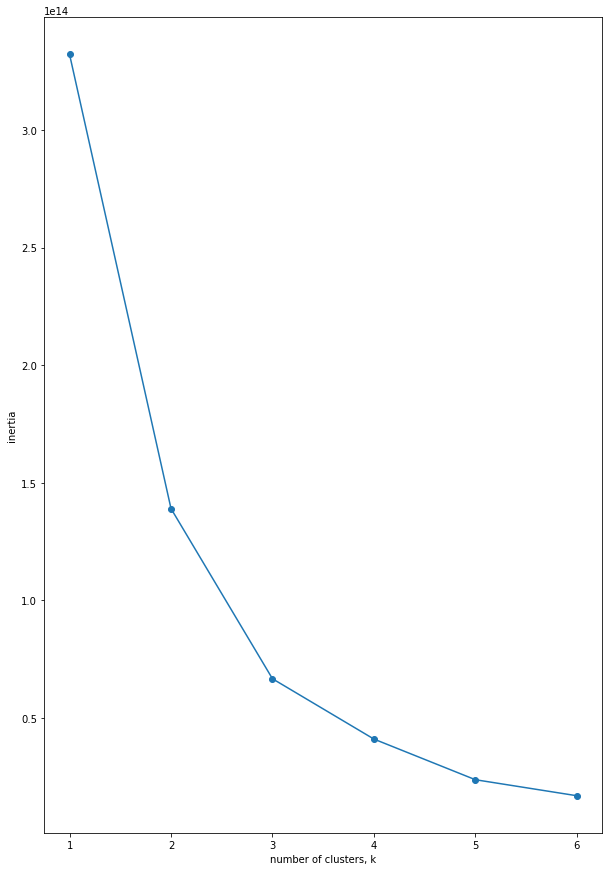

In [421]:
# Import KMeans to start, I'll try KNN afterwards
from sklearn.cluster import KMeans

ks = range(1, 7)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model =KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(X_train)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.figure(figsize=(10,15))
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [422]:
 # Create a KMeans instance with k clusters: model
model =KMeans(n_clusters=3)

# Fit model to samples
model.fit(X_train)
model.score(X_test)

-27393945830480.41

In [423]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [424]:
model.predict(X_train)

array([0, 0, 0, ..., 0, 0, 2])

In [425]:
knn=X_train.copy()
knn['group']=model.predict(X_train)

In [426]:
knn.sort_index(inplace=True)

In [427]:
knn['Deaths']=y_train
knn

,Admin2,Province/State,Confirmed,Country/Region,Lat,Long_,Total_Pop,Booster,Booster Coverage,Complete,Complete Coverage,Partial,Partial Coverage,group,Deaths
Combined_Key,,,,,,,,,,,,,,,
"Abbeville, South Carolina, US",0,39,5703,0,34.223334,-82.461707,24295.0,4383.0,17.870102,9807.0,39.984507,10985.0,44.787377,0,57
"Acadia, Louisiana, US",1,17,13609,0,30.295065,-92.414197,57576.0,11645.0,18.768636,32861.0,52.963172,36705.0,59.158675,0,260
"Accomack, Virginia, US",2,45,6230,0,37.767072,-75.632346,33413.0,10452.0,32.343112,23700.0,73.338284,26683.0,82.569006,0,86
"Ada, Idaho, US",3,11,99096,0,43.452658,-116.241552,494967.0,145690.0,30.252062,309559.0,64.278936,344049.0,71.440674,2,905
"Adair, Iowa, US",4,14,1434,0,41.330756,-94.471059,7496.0,2077.0,29.040828,3532.0,49.384787,3807.0,53.229866,0,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Young, Texas, US",1625,42,3522,0,33.176597,-98.687909,17867.0,2730.0,15.158245,7480.0,41.532482,8410.0,46.696280,0,76
"Yuma, Arizona, US",1626,2,55176,0,32.768957,-113.906667,203881.0,57656.0,26.968899,150350.0,70.327008,190918.0,89.302904,0,1028
"Zapata, Texas, US",1627,42,2815,0,27.001564,-99.169872,13889.0,2702.0,19.056351,8497.0,59.926652,10001.0,70.533888,0,47


In [429]:
import seaborn as sns

<AxesSubplot:xlabel='Confirmed', ylabel='Total_Pop'>

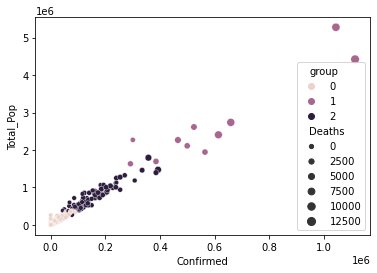

In [430]:
sns.scatterplot(x='Confirmed',y='Total_Pop', data=knn, hue='group', size='Deaths')

<AxesSubplot:title={'center':'US Confirmed Cases'}, xlabel='Long_', ylabel='Lat'>

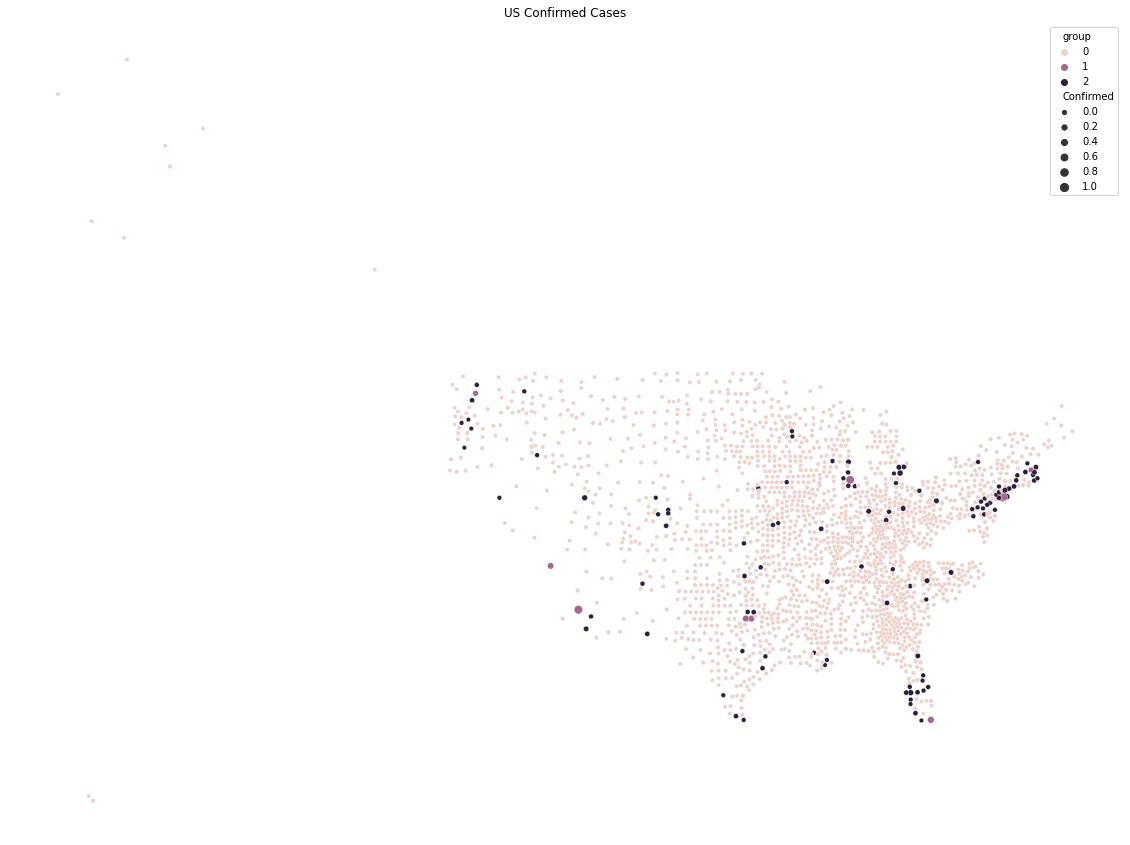

In [439]:
plt.figure(figsize=(20,15))
plt.title('US Confirmed Cases')
plt.axis('off')
sns.scatterplot(x='Long_',y='Lat', data=knn, hue='group', size='Confirmed')
plt.show

In [440]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score 

In [441]:
test_scores = []
train_scores = []
rmse_val =[]
for i in range(1,20):

    knn = KNeighborsRegressor(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train)) # Score on Trained data
    test_scores.append(knn.score(X_test,y_test)) # Score on Test data
    pred=knn.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values

In [442]:
cf=pd.DataFrame([train_scores,test_scores, rmse_val]).transpose()
cf.rename(columns={0:'Train Score',1:'Test Score',2:'RMSE'}, inplace=True)
cf

,Train Score,Test Score,RMSE
0,1.000000,0.853277,271.276580
1,0.947351,0.854042,270.568853
2,0.936572,0.890303,234.563432
3,0.907892,0.899411,224.614739
4,0.899340,0.927543,190.634910
...,...,...,...
14,0.814106,0.887338,237.712992
15,0.802056,0.876956,248.423972
16,0.792783,0.867548,257.746699
17,0.785329,0.859115,265.824719


In [443]:
import seaborn as sns

The score is  0.9275434488180437


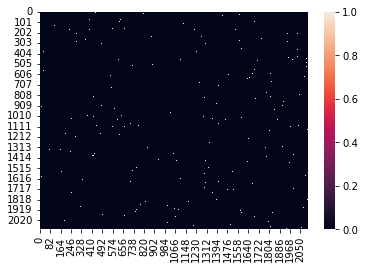

In [446]:
knn = KNeighborsRegressor(5)
knn.fit(X_train,y_train)

train_scores=(knn.score(X_train,y_train)) # Score on Trained data
test_scores=(knn.score(X_test,y_test)) # Score on Test data
pred=knn.predict(X_test) # make prediction on test set
sns.heatmap(knn.kneighbors_graph().toarray()) #draw a heatmap
print ('The score is ',test_scores)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


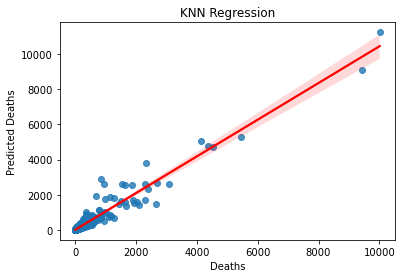

In [447]:
knn_plot=sns.regplot(y_test,pred,line_kws={"color": "red"})
knn_plot=plt.title('KNN Regression')
knn_plot=plt.xlabel('Deaths')
knn_plot=plt.ylabel('Predicted Deaths')
plt.show()

## Prediction by state

In [448]:
mean=df5.groupby('Province/State').mean()
df6=df5.groupby('Province/State').sum()
df6['Lat']=mean['Lat']
df6['Long_']=mean['Long_']
df6

,Confirmed,Deaths,Lat,Long_,Total_Pop,Booster,Booster Coverage,Complete,Complete Coverage,Partial,Partial Coverage
Province/State,,,,,,,,,,,
Alabama,1130535,16541,32.860414,-86.723793,4952671.0,825870.0,1033.282013,2289916.0,2903.539113,2807520.0,3558.328029
Alaska,78079,457,61.254298,-149.980919,315371.0,65700.0,300.703177,163129.0,678.304014,182890.0,740.831076
Arizona,1752553,25623,33.675904,-111.463232,7151502.0,1826933.0,417.518868,4373161.0,974.751029,5173547.0,1124.395992
Arkansas,718568,9515,34.911889,-92.433978,3011524.0,595002.0,1351.359659,1483910.0,3445.089075,1761645.0,4075.511190
Colorado,1185749,10809,38.935474,-105.486240,5773714.0,2062294.0,1921.701957,4533000.0,4266.605642,4950142.0,4643.653255
...,...,...,...,...,...,...,...,...,...,...,...
Virginia,10971,158,37.236469,-79.379206,55586.0,14710.0,50.521825,35536.0,123.869813,40360.0,140.960331
Washington,1150176,10401,47.233786,-120.719220,7705281.0,2830060.0,1189.286536,5300803.0,2329.242756,5841791.0,2584.490448
West Virginia,414727,5552,38.840813,-80.598318,1774605.0,450659.0,1306.198453,992544.0,2872.488198,1122106.0,3217.557136


In [449]:
X=df6.drop('Deaths',axis=1)
y=df6.Deaths

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42) # random_state used for reproducibility
print(X_train.shape, X_test.shape)
print(y_train.shape,y_test.shape)

(37, 10) (13, 10)
(37,) (13,)


In [450]:
test_scores = []
train_scores = []
rmse_val =[]
for i in range(1,20):

    knn = KNeighborsRegressor(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train)) # Score on Trained data
    test_scores.append(knn.score(X_test,y_test)) # Score on Test data
    pred=knn.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    
cf=pd.DataFrame([train_scores,test_scores, rmse_val]).transpose()
cf.rename(columns={0:'Train Score',1:'Test Score',2:'RMSE'}, inplace=True)
cf

,Train Score,Test Score,RMSE
0,1.000000,0.853188,4082.590599
1,0.985128,0.793755,4838.892340
2,0.966719,0.792176,4857.381089
3,0.942371,0.764660,5168.945985
4,0.899565,0.776945,5032.225989
...,...,...,...
14,0.568366,0.760189,5217.823370
15,0.538398,0.714158,5696.623324
16,0.514004,0.682147,6007.134976
17,0.488610,0.640227,6390.996885


The score is  0.7937552181937215


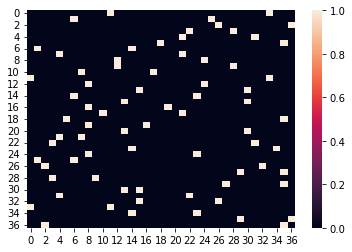

In [453]:
knn = KNeighborsRegressor(2)
knn.fit(X_train,y_train)

train_scores=(knn.score(X_train,y_train)) # Score on Trained data
test_scores=(knn.score(X_test,y_test)) # Score on Test data
pred=knn.predict(X_test) # make prediction on test set
sns.heatmap(knn.kneighbors_graph().toarray()) #draw a heatmap
print ('The score is ',test_scores)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


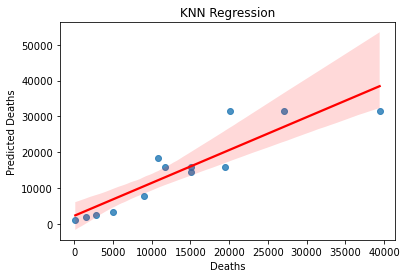

In [454]:
knn_plot=sns.regplot(y_test,pred,line_kws={"color": "red"})
knn_plot=plt.title('KNN Regression')
knn_plot=plt.xlabel('Deaths')
knn_plot=plt.ylabel('Predicted Deaths')
plt.show()

It's almost like there are two things happening here.  One for the data with large numbers of deaths and the other for small numbers